<h1><p><center style="background: linear-gradient(to right,white,green);color: transparent;font-family: Gabriola;color: navy;font-size: 210%;text-align: center;border-radius: 10px 70px">
     📈 Gold and USO and SLV Price 💰
</center></p></h1>

<a class="anchor" id="setup"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">1️⃣ Step 1 | About Dataset </font><br>
 <br>   
<br>

<div style = 'border : 3px solid non; background-color:#F0FFFF ; ;padding:10px'>

<a class="anchor" id="about_dataset"></a>

<p style="font-family:Georgia;padding:20px;line-height:25px;";><font style="font-family:Georgia; font-size:210%;"> 👁‍🗨About Dataset </font><br>


    
**Welcome, data enthusiasts!**

Data Overview: This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.
    
<br>

<a class="anchor" id="setup"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">2️⃣ Step 2 | Python Libraries </font><br>
 <br>   
<br>

In [ ]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 34.0 MB/s eta 0:00:00


In [ ]:
import mysql.connector as msql
from mysql.connector import Error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as st
from scipy.stats import norm, skew, kurtosis

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import warnings

<a class="anchor" id="data"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">3️⃣ Step 3 | Getting data from the database </font><br>
 <br>   
<br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/gold price/gld_price_data.csv')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
try:
    con = msql.connect(host='127.0.0.1',user='root',password='peiman2012')
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("create database GoldPrice ")
        print("Databases is created....")

except Error as e :
    print("Error while connecting to MYSQL",e)

Error while connecting to MYSQL 2003: Can't connect to MySQL server on '127.0.0.1:3306' (Errno 111: Connection refused)


In [ ]:
try:

    con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='goldprice'
                       )
    if con.is_connected():
        cursor = con.cursor()
        cursor.execute("SELECT DATABASE();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)


        cursor.execute('DROP TABLE IF EXISTS GoldP7;')
        print('Creating table....')
        cursor.execute("""
            CREATE TABLE GoldP7 (
                date CHAR(20),
                SPX FLOAT,
                GLD FLOAT,
                USO FLOAT,
                SLV FLOAT,
                EUR_USD FLOAT
            )
        """)
        print("Table is created....")

        for index, row in df.iterrows():
            sql = "INSERT INTO GoldP7 (date, SPX, GLD, USO, SLV, EUR_USD) VALUES (%s, %s, %s, %s, %s, %s)"
            cursor.execute(sql, (row['Date'], float(row['SPX']), float(row['GLD']), float(row['USO']), float(row['SLV']), float(row['EUR/USD'])))

        con.commit()
        print("Data inserted successfully.")

except Error as e:
    print("Error while connecting to MYSQL", e)

finally:
    if 'cursor' in locals():
        cursor.close()
    if 'con' in locals():
        con.close()

You're connected to database:  ('goldprice',)

Creating table....

Table is created....

Data inserted successfully.


In [ ]:
con = msql.connect(host='127.0.0.1',
                       user='root',
                       password='peiman2012',
                       database='goldprice'
                       )
cursor = con.cursor()
sql = "SELECT * FROM GoldP7 "
cursor.execute(sql)
# Fetch all the records
date = []
SPX = []
GLD = []
USO = []
SLV = []
EUR_USD = []
result = cursor.fetchall()
for i in result:
    date.append(i[0])
    SPX.append(i[1])
    GLD.append(i[2])
    USO.append(i[3])
    SLV.append(i[4])
    EUR_USD.append(i[5])
df2 = pd.DataFrame({
    'Date':date,
    'SPX':SPX,
    'GLD':GLD,
    'USO':USO,
    'SLV':SLV ,
    'EUR_USD':EUR_USD})


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%m/%d/%Y').dt.date

In [ ]:
df2

,Date,SPX,GLD,USO,SLV,EUR_USD
0,2008-01-02,1447.16,84.860,78.4700,15.1800,1.47169
1,2008-01-03,1447.16,85.570,78.3700,15.2850,1.47449
2,2008-01-04,1411.63,85.130,77.3100,15.1670,1.47549
3,2008-01-07,1416.18,84.770,75.5000,15.0530,1.46830
4,2008-01-08,1390.19,86.780,76.0600,15.5900,1.55710
...,...,...,...,...,...,...
2285,2018-05-08,2671.92,124.590,14.0600,15.5100,1.18679
2286,2018-05-09,2697.79,124.330,14.3700,15.5300,1.18472
2287,2018-05-10,2723.07,125.180,14.4100,15.7400,1.19175
2288,2018-05-14,2730.13,124.490,14.3800,15.5600,1.19312


<a class="anchor" id="data"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">3️⃣ Step 4 | EDA </font><br>
 <br>   
<br>

In [ ]:
df2.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR_USD    0
dtype: int64

In [ ]:
df2.describe()

,SPX,GLD,USO,SLV,EUR_USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315777,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530000,70.000000,7.960000,8.850000,1.039050
25%,1239.875000,109.725000,14.380000,15.570000,1.171310
50%,1551.435000,120.580000,33.870000,17.268500,1.303295
75%,2073.010000,132.840000,37.827500,22.882500,1.369968
max,2872.870000,184.590000,117.480000,47.260000,1.598800


In [ ]:
col = df2.shape
print(f'Number of rows : {col[0]} and Number of columns : {col[1]}')

Number of rows : 2290 and Number of columns : 6


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2290 entries, 0 to 2289

Data columns (total 6 columns):

 #   Column   Non-Null Count  Dtype  

---  ------   --------------  -----  

 0   Date     2290 non-null   object 

 1   SPX      2290 non-null   float64

 2   GLD      2290 non-null   float64

 3   USO      2290 non-null   float64

 4   SLV      2290 non-null   float64

 5   EUR_USD  2290 non-null   float64

dtypes: float64(5), object(1)

memory usage: 107.5+ KB


In [ ]:
name3 = list(df2.columns[1:])

In [ ]:
def plot_seaborn(n1):
    plt.figure(figsize=(13, 8))

    for i in range(len(n1)):

        plt.subplot(2, 3, i+1)

        sns.histplot(df2[n1[i]], kde=True)
        plt.title(f'Distribution of {n1[i]}')

    plt.tight_layout()
    plt.show()

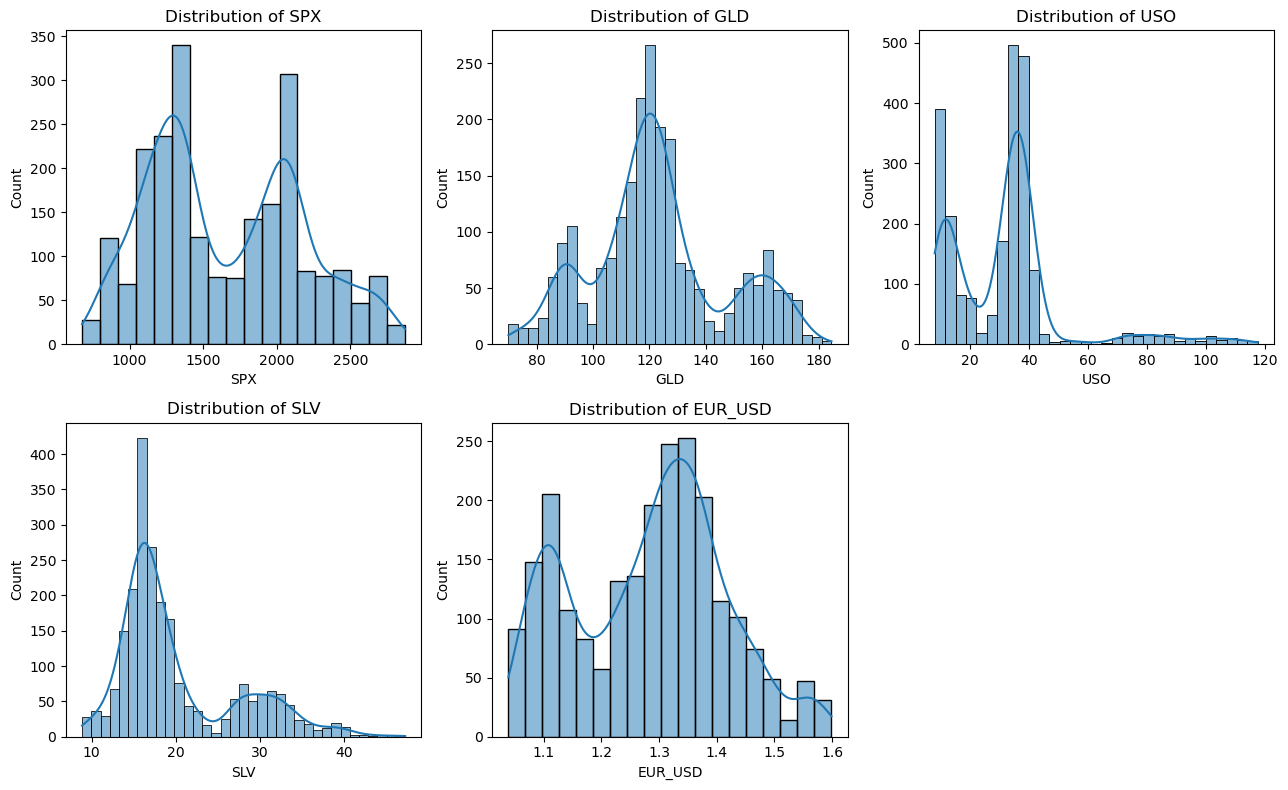

In [ ]:
plot_seaborn(name3)


#### S&P 500 Index (SPX)
Distribution: The distribution is approximately normal, with a central peak and relatively short tails. This indicates that most of the prices of this index are located around an average value and that large deviations from this value are less common.
Interpretation: The normal distribution of SPX means that the performance of this index is often predictable and sharp and sudden changes occur less often.

#### Gold (GLD)
Distribution: The gold distribution is also roughly normal, but with more dispersion than the SPX. This shows that the price of gold is more volatile than the S&P 500 index.
Interpretation: Greater dispersion in gold prices may be due to various factors such as exchange rate fluctuations, demand for jewelery and safe investments.

#### Oil (USO)
Distribution: Oil distribution is strongly skewed and has a long right tail. This shows that oil prices often experience sudden and significant increases, but sharp decreases are less common.
Interpretation: The volatility of oil distribution is due to various factors such as global oil supply and demand, political tensions and geopolitical events.

#### Silver (SLV)
Distribution: The distribution of silver is similar to gold, almost normal but with more dispersion.
Comment: Greater dispersion in silver prices may be due to industrial demand for silver, safe haven investments and gold price volatility.

#### Euro to US Dollar (EUR_USD)
Distribution: The distribution of the euro to dollar exchange rate is also almost normal.
Interpretation: The normal distribution of the exchange rate shows that the fluctuation of the exchange rate of Euro to the dollar is in a certain range and sharp and sudden changes occur less often.

In [ ]:
def box_seaborn(n1):
    plt.figure(figsize=(13, 8))

    for i in range(len(n1)):

        plt.subplot(2, 3, i+1)

        sns.boxplot(x = df2[n1[i]])
        plt.title(f'Distribution of {n1[i]}')

    plt.tight_layout()
    plt.show()

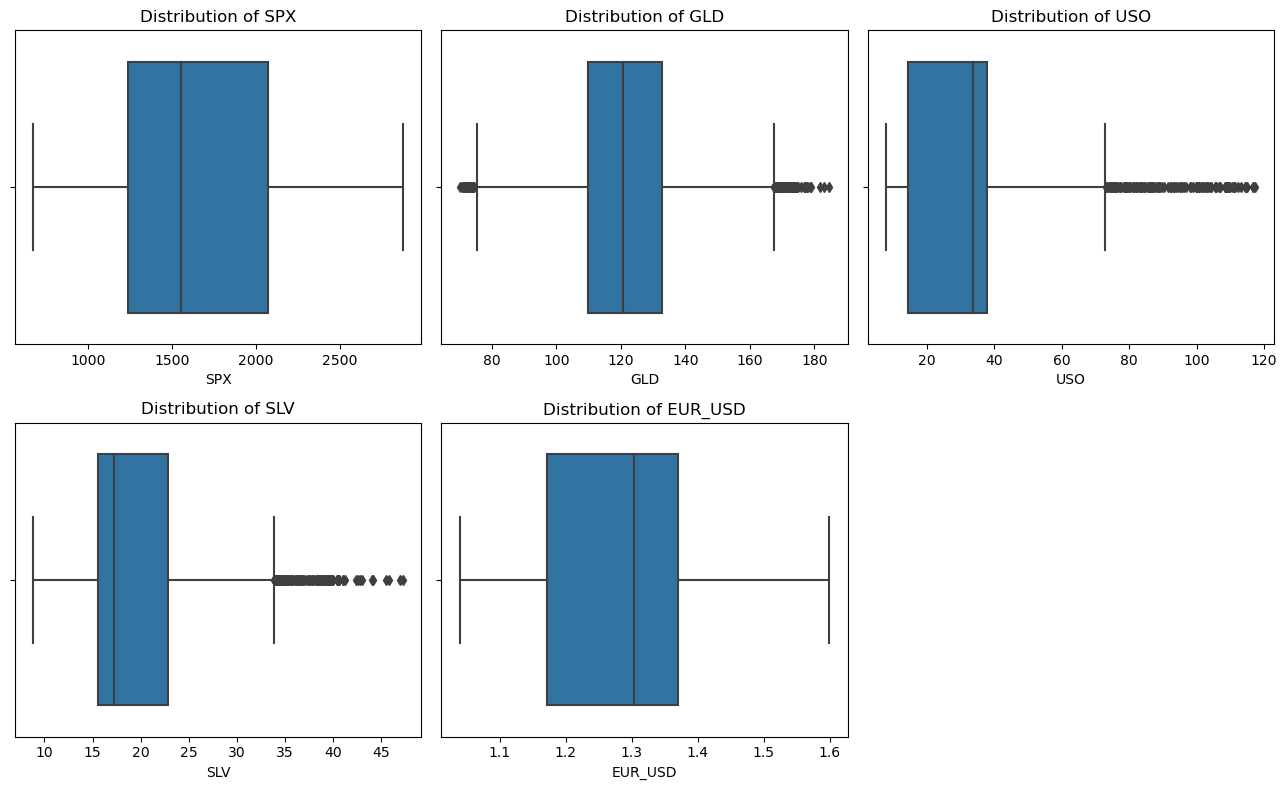

In [ ]:
box_seaborn(name3)


Price volatility: The price of gold, oil and silver has fluctuated more than the S&P 500 index and the euro-dollar exchange rate. This is especially evident in the case of oil and gold prices.
Outlier data: The presence of outlier data in the charts of gold, oil and silver shows that in some periods, certain factors have caused the price of these assets to increase or decrease sharply.
Correlation: The similarity between the charts of gold, oil and silver suggests that there may be a correlation between the prices of these assets.

In [ ]:
name = ['GLD','USO','SLV','EUR_USD','SPX']
name2 = ['Gold ETF (GLD) Price','United States Oil Fund (USO) Price','Silver Trust (SLV) Price','EUR/USD exchange rate','SPX rate']

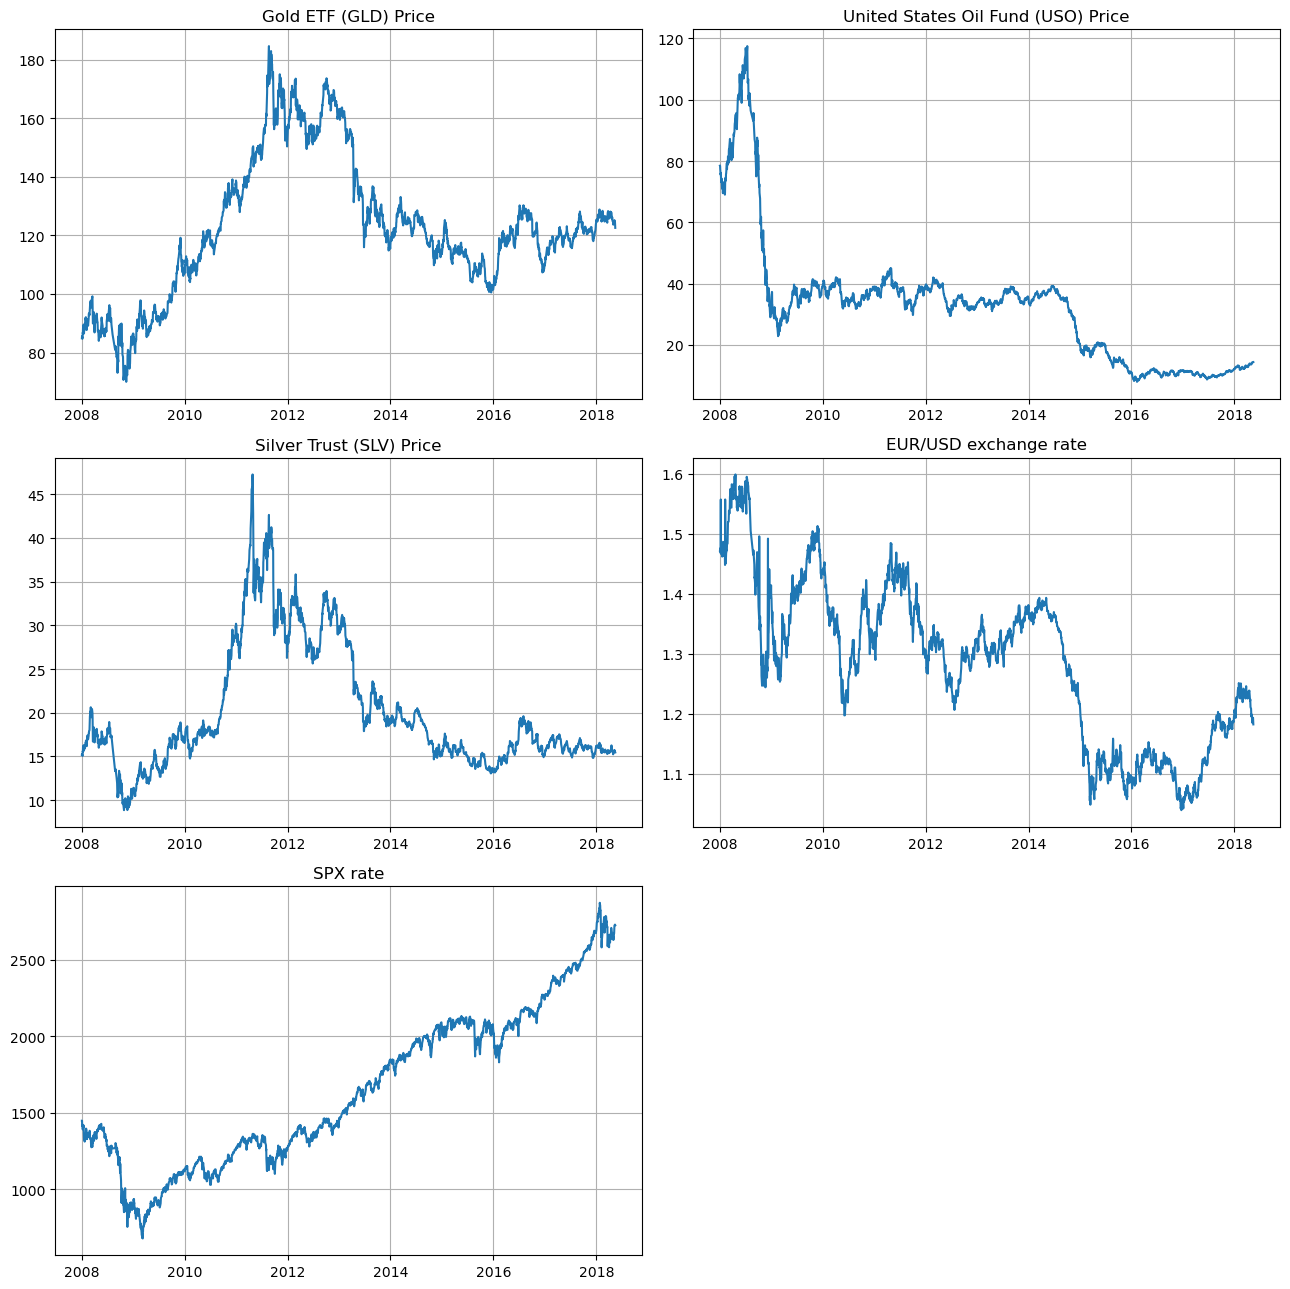

In [ ]:
def plot1(n1,n2):
    plt.figure(figsize=(13, 13))

    for i in range(len(n1)):

        plt.subplot(3, 2, i+1)

        plt.plot(df2['Date'],df2[n1[i]])
        plt.title(n2[i])
        plt.grid()

    plt.tight_layout()
    plt.show()

plot1(name,name2)


Economic Crisis Impact All assets show significant movement around the 2008-2009 period, reflecting the impact of the global financial crisis,Safe-Haven Assets Gold and silver spiked post-crisis, indicating their roles as safe-haven assets.Oil Prices: Show a prolonged decline, reflecting changes in global demand and supply dynamics,Currency Exchange Rate The EUR/USD rate shows the relative strength of the USD against the Euro over the decade.Equity Market The S&P 500’s recovery and growth post-crisis reflect a strong equity market performance in the US.

In [ ]:
df3=df2.copy()

In [ ]:
df3['Date'] = pd.to_datetime(df3['Date'])

df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month
df3['Day'] = df3['Date'].dt.day

In [ ]:
months_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

df3['Month Name'] = list(map(lambda x: months_dict[x], df3['Month']))

In [ ]:
years = []
for i in df3['Year']:
    if i not in years:
        years.append(i)
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [ ]:
def bar_plot(n,num,n2):
    plt.figure(figsize=(20, 25))

    for i in range(len(num)):
        plt.subplot(6, 3, i+1)

        df4=df3[df3['Year']==num[i]]
        plt.barh(df4['Month Name'],df4[n2])
        plt.title(f'{n} in {num[i]}')
    plt.show()


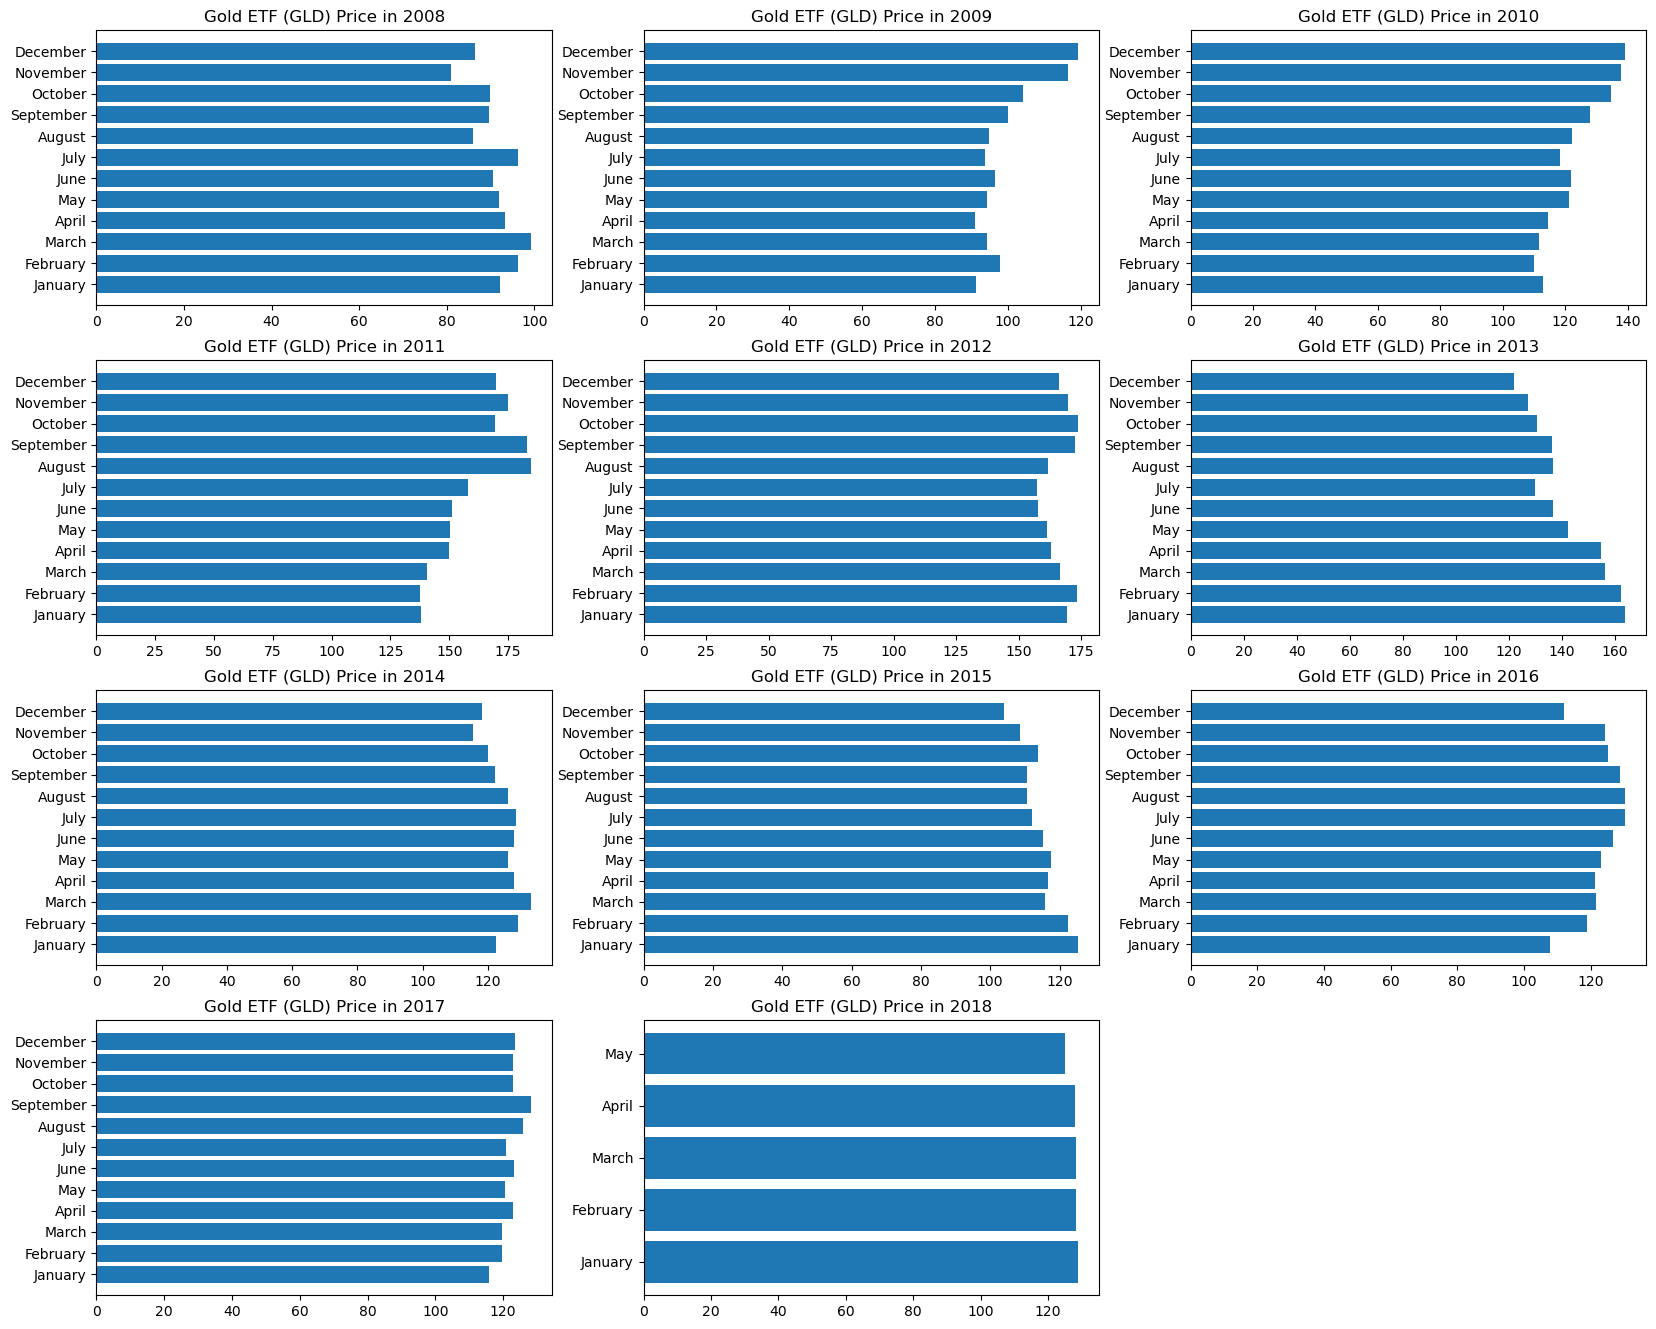

In [ ]:
bar_plot(name2[0],years,name[0])


Bullish until 2011: From 2008 to mid-2011, the price of gold had a significant upward trend. This period is associated with the global financial crisis and economic concerns, and gold as a safe asset has attracted the attention of investors.
Decline through 2015: After peaking in 2011, gold prices have been on a downward trend through 2015. This decrease may be related to reasons such as improving global economic conditions, strengthening the US dollar and decreasing demand for gold as a safe haven.Relative stability until the end of the period From 2015 to 2018, the gold price fluctuated less and generally stayed in a certain price range.

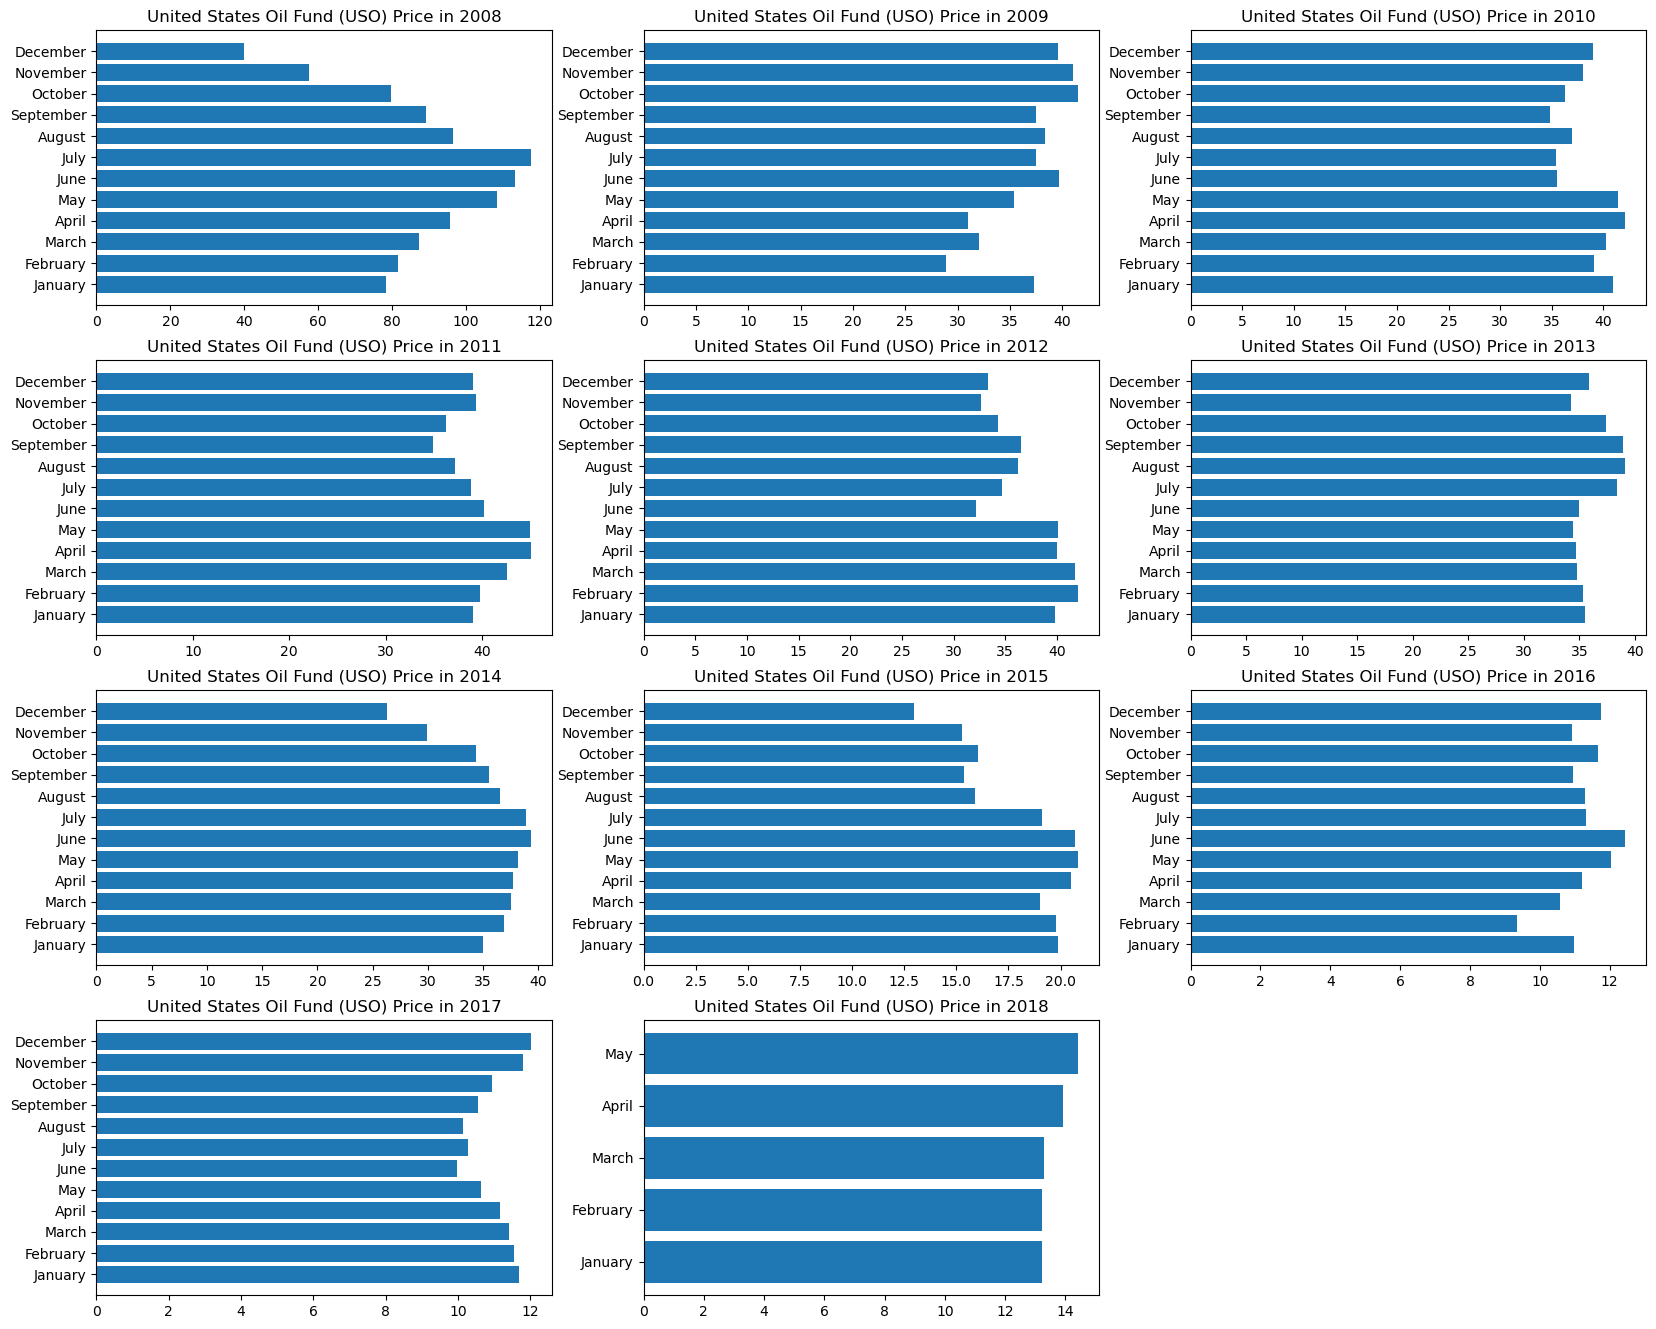

In [ ]:
bar_plot(name2[1],years,name[1])


The presented graphs show the changes in crude oil prices (measured using the USO exchange-traded fund) in the period from 2008 to 2018. Each bar in the chart represents the average price of crude oil in a particular month. By examining these charts, we can identify several general trends:

Extreme fluctuations Crude oil prices have experienced extreme fluctuations during the period under review. These fluctuations are influenced by various factors including supply and demand, geopolitical events, and changes in energy policies of different countries.

Declining prices in 2014-2016 After peaking in the early years of the decade, crude oil prices experienced a significant decline in 2014-2016. The decline was mainly due to increased shale oil production in the United States and lower demand as a result of China's sluggish economic growth.

Attempts to recover in 2017-2018 Since late 2016, crude oil prices have shown attempts to recover. This improvement was due to production cut agreements between OPEC member countries and some independent producers.



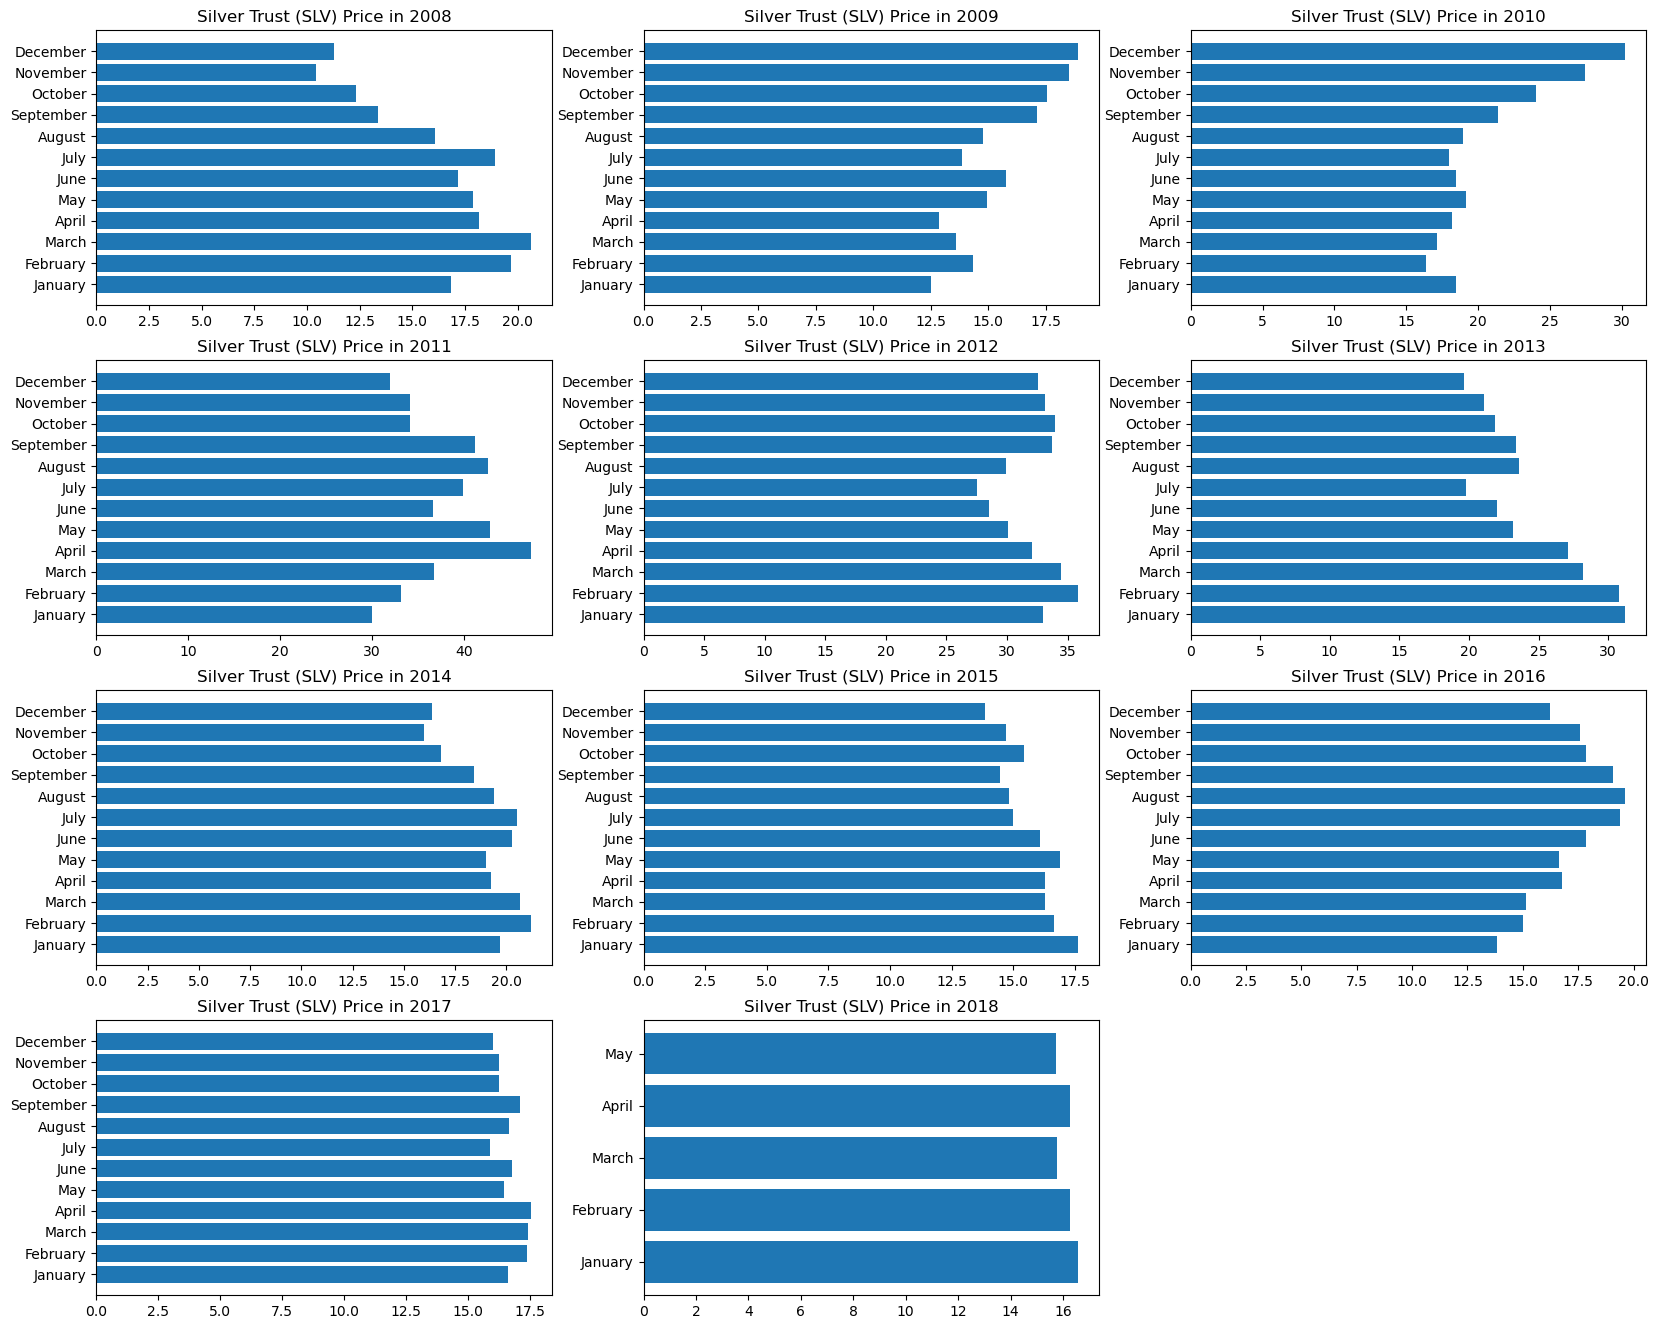

In [ ]:
bar_plot(name2[2],years,name[2])

Significant rise early in the decade As the charts show, the price of silver had a significant upward trend from 2008 to the mid-2010s. This price increase may be related to reasons such as improving global economic conditions, increasing demand for silver in various industries (such as electronics and solar energy), and investing in silver as a safe-haven asset.
Decline and stabilization at the end of the decade After peaking in the middle of the decade, the price of silver took a downward trend and stabilized in a certain price range in the last years of the decade. This decrease may be related to market saturation, lower inflation rate and increased silver supply.


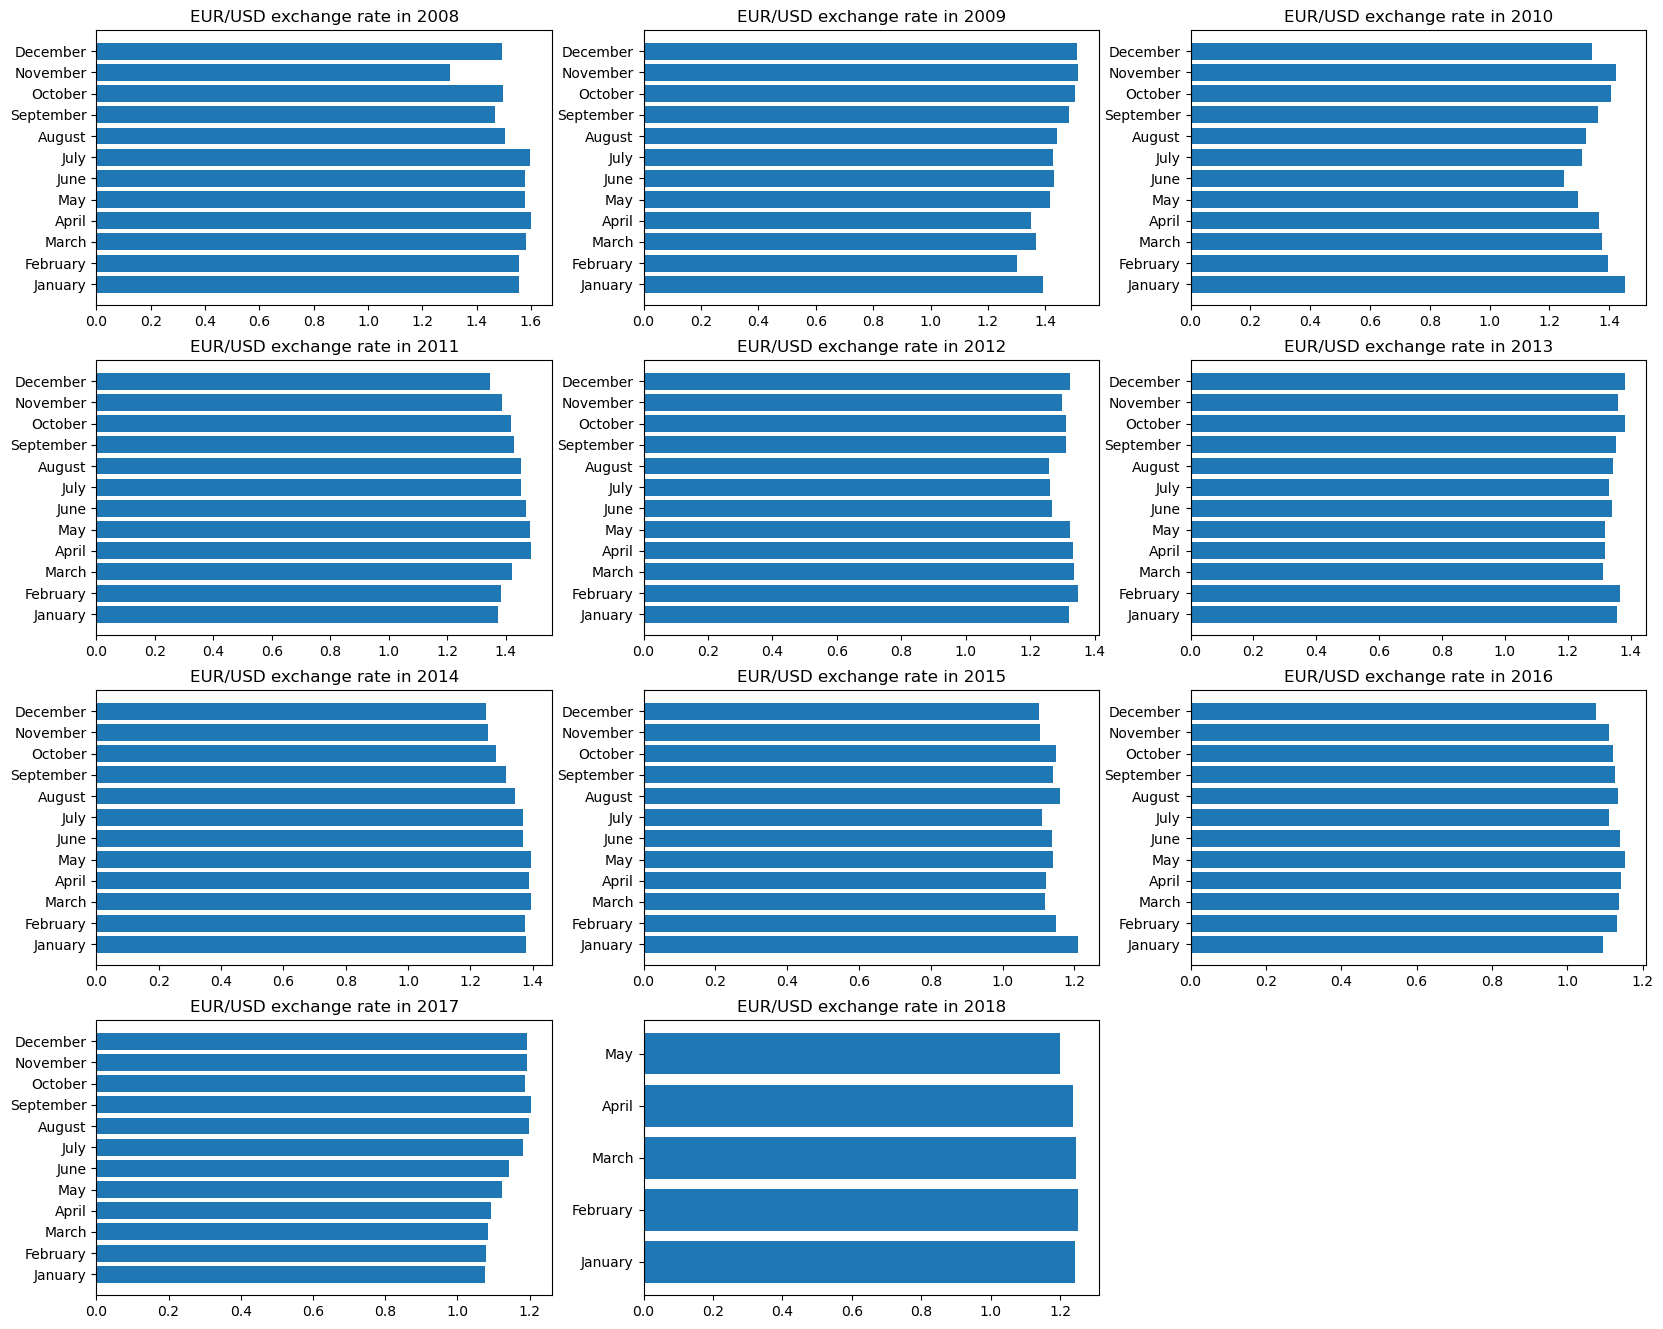

In [ ]:
bar_plot(name2[3],years,name[3])

Significant Fluctuations The Euro-Dollar parity rate has had significant fluctuations during the period under review. These fluctuations are influenced by various economic, political factors and global events.

Gradual decline in early decade  In the early years of the decade (2008 to about 2012), we saw a gradual decline in the value of the Euro against the dollar. This decrease may be related to the global financial crisis and the economic problems of the Eurozone.

Relative stability in the middle of the decade From about 2012 to 2015, the EUR/USD parity was in a relatively stable range.

Volatility again at the end of the decade In 2016 and 2017, the parity rate again experienced significant volatility. These fluctuations may be due to the US presidential election, the monetary policies of the European Central Bank (ECB) and other related factors.

In [ ]:
def seasen(n):
    se = []
    for i in n:
        if i >= 1 and i <= 3:
            se.append('Winter')
        elif i >= 4 and i <= 6:
            se.append('Spring')
        elif i >= 7 and i <= 9:
            se.append('Summer')
        elif i >= 10 and i <= 12:
            se.append('Autumn')
    return se


df3['Season'] = seasen(df3['Month'])


In [ ]:
def bar_plot_seasen(n,num,n2):
    plt.figure(figsize=(20, 25))

    for i in range(len(num)):
        plt.subplot(6, 3, i+1)

        df4=df3[df3['Year']==num[i]]
        plt.barh(df4['Season'],df4[n2])
        plt.title(f'{n} in {num[i]}')
    plt.show()

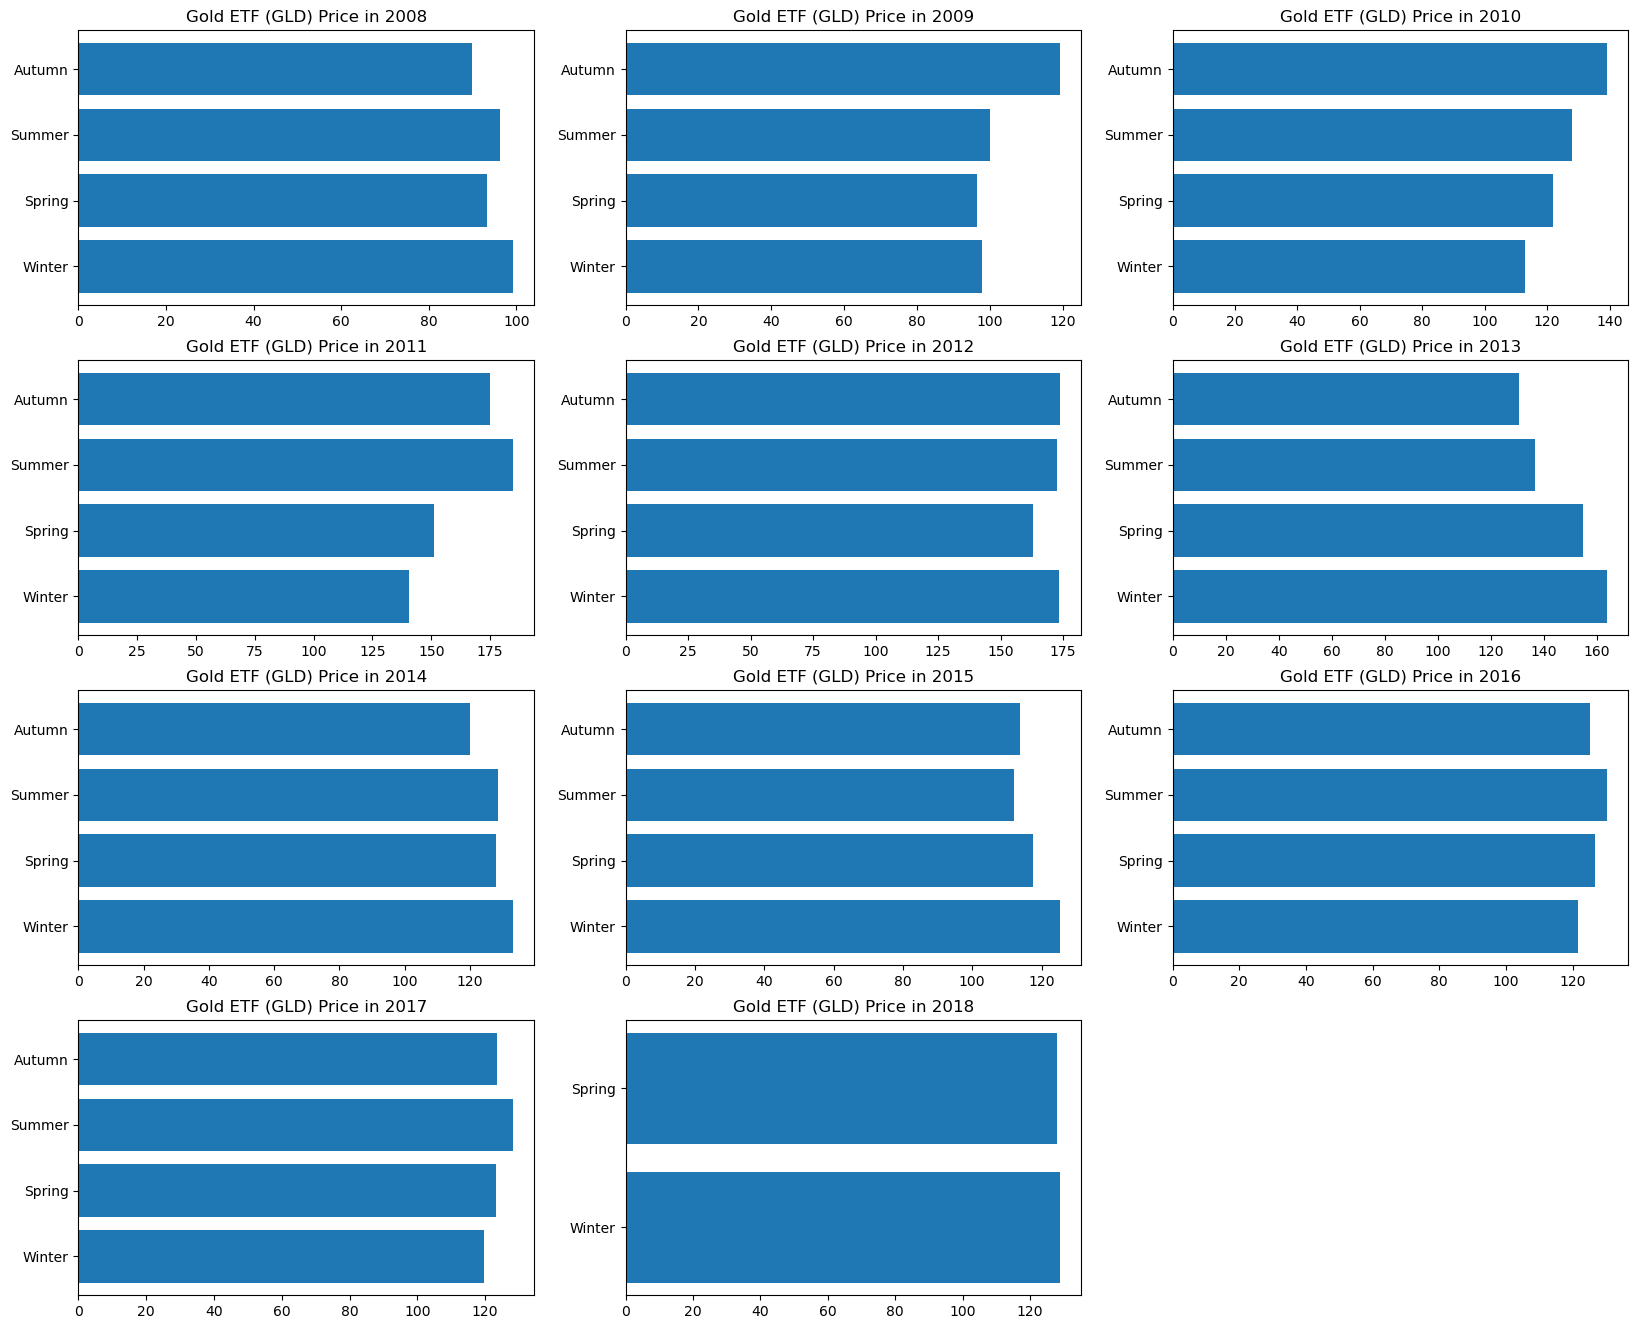

In [ ]:
bar_plot_seasen(name2[0],years,name[0])

Price changes during the year It seems that the price fluctuations of gold during the year are not very significant. That is, in general, the price of gold does not differ significantly in different seasons of the year.Upward Until 2011, we generally see an upward trend in gold prices. This price increase may be due to the global financial crisis and increased demand for gold as a safe-haven asset.Decreasing and stabilizing  After 2011, the price of gold started a downward trend and stabilized in a certain price range in the following years. This decrease may be related to the improvement of global economic conditions and the decrease in demand for gold as a safe haven.

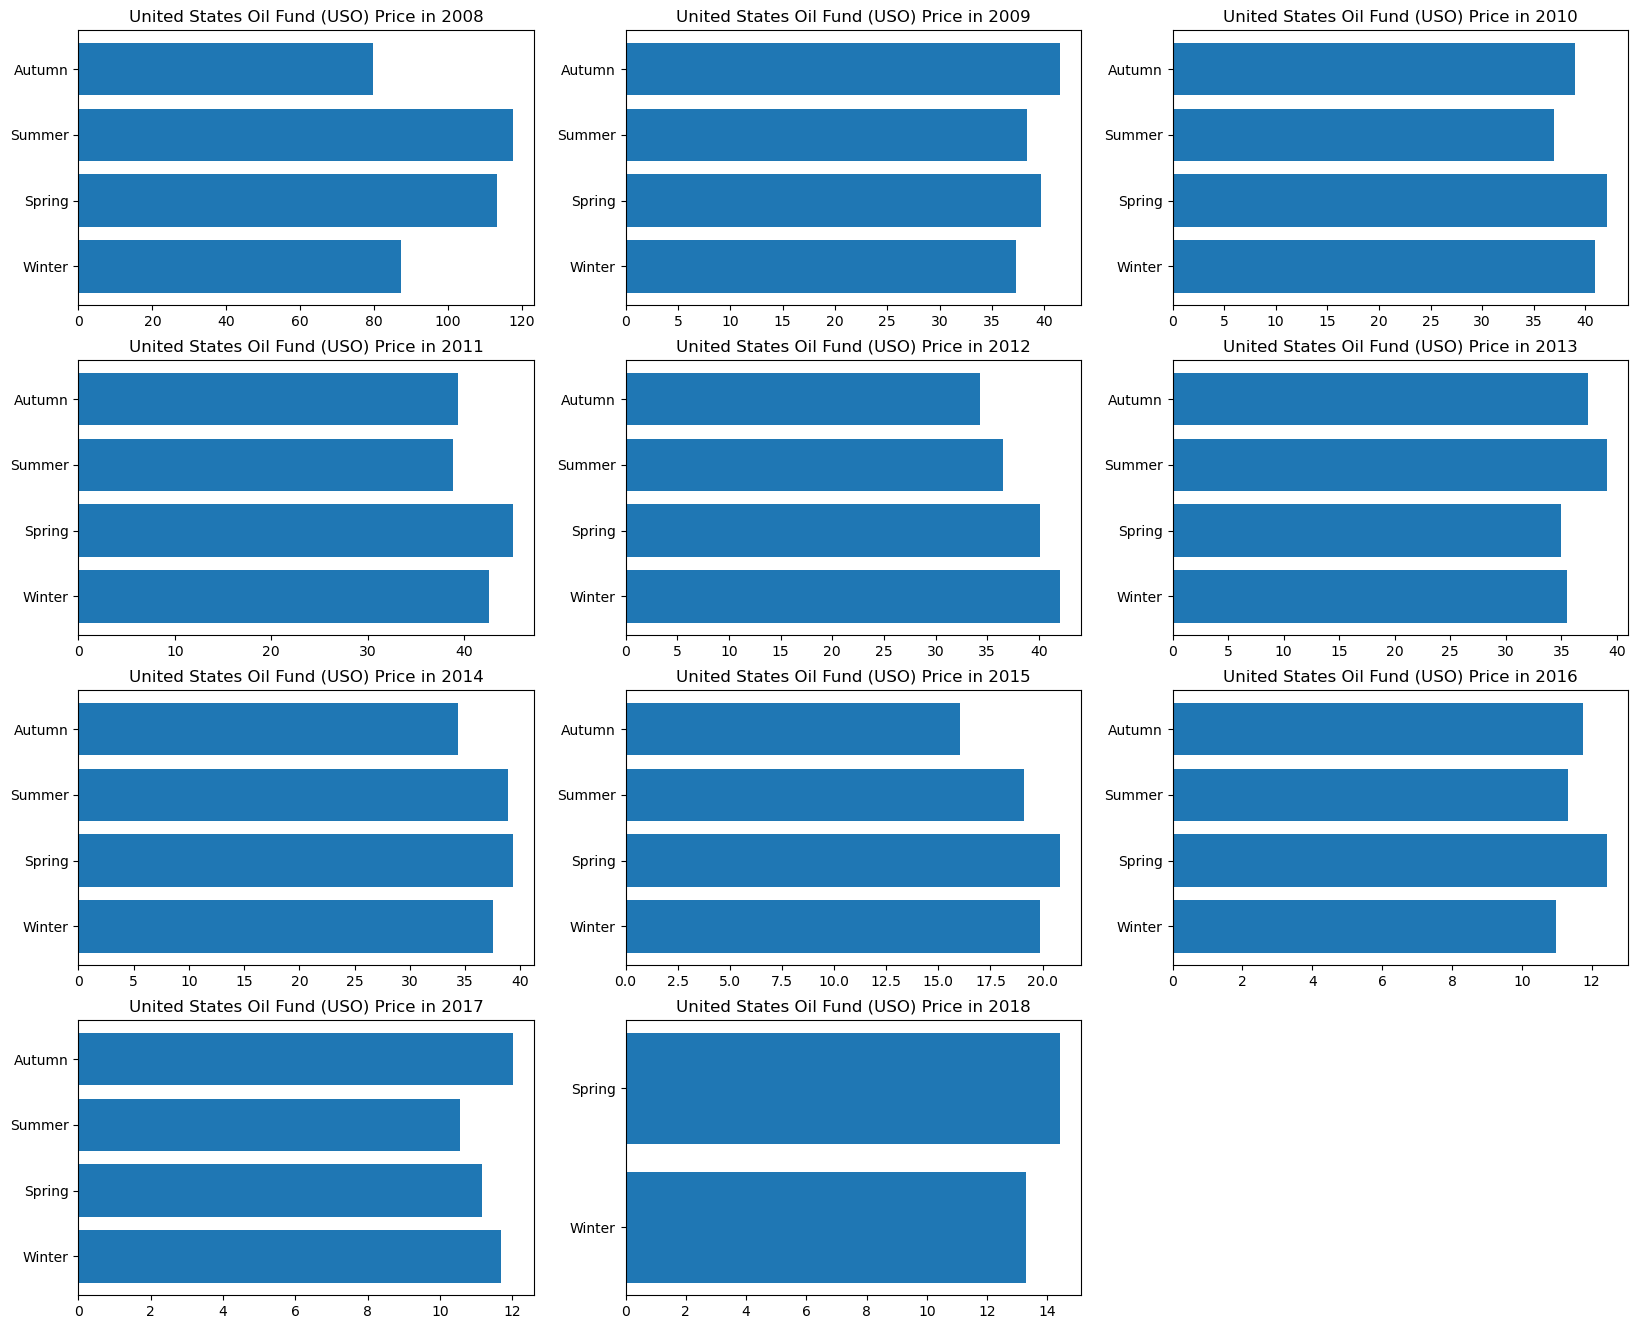

In [ ]:
bar_plot_seasen(name2[1],years,name[1])

Severe fluctuations Crude oil prices have experienced severe fluctuations during the period under review. These fluctuations are influenced by various factors including supply and demand, geopolitical events, and changes in energy policies of different countries.Price Decline in 2014-2016 After peaking in the early years of the decade, crude oil prices experienced a significant decline in 2014-2016. The decline was mainly due to increased shale oil production in the United States and lower demand as a result of China's sluggish economic growth.Trying to recover in 2017-2018Since late 2016, crude oil prices have shown attempts to recover. This improvement was due to production cut agreements between OPEC member countries and some independent producers.

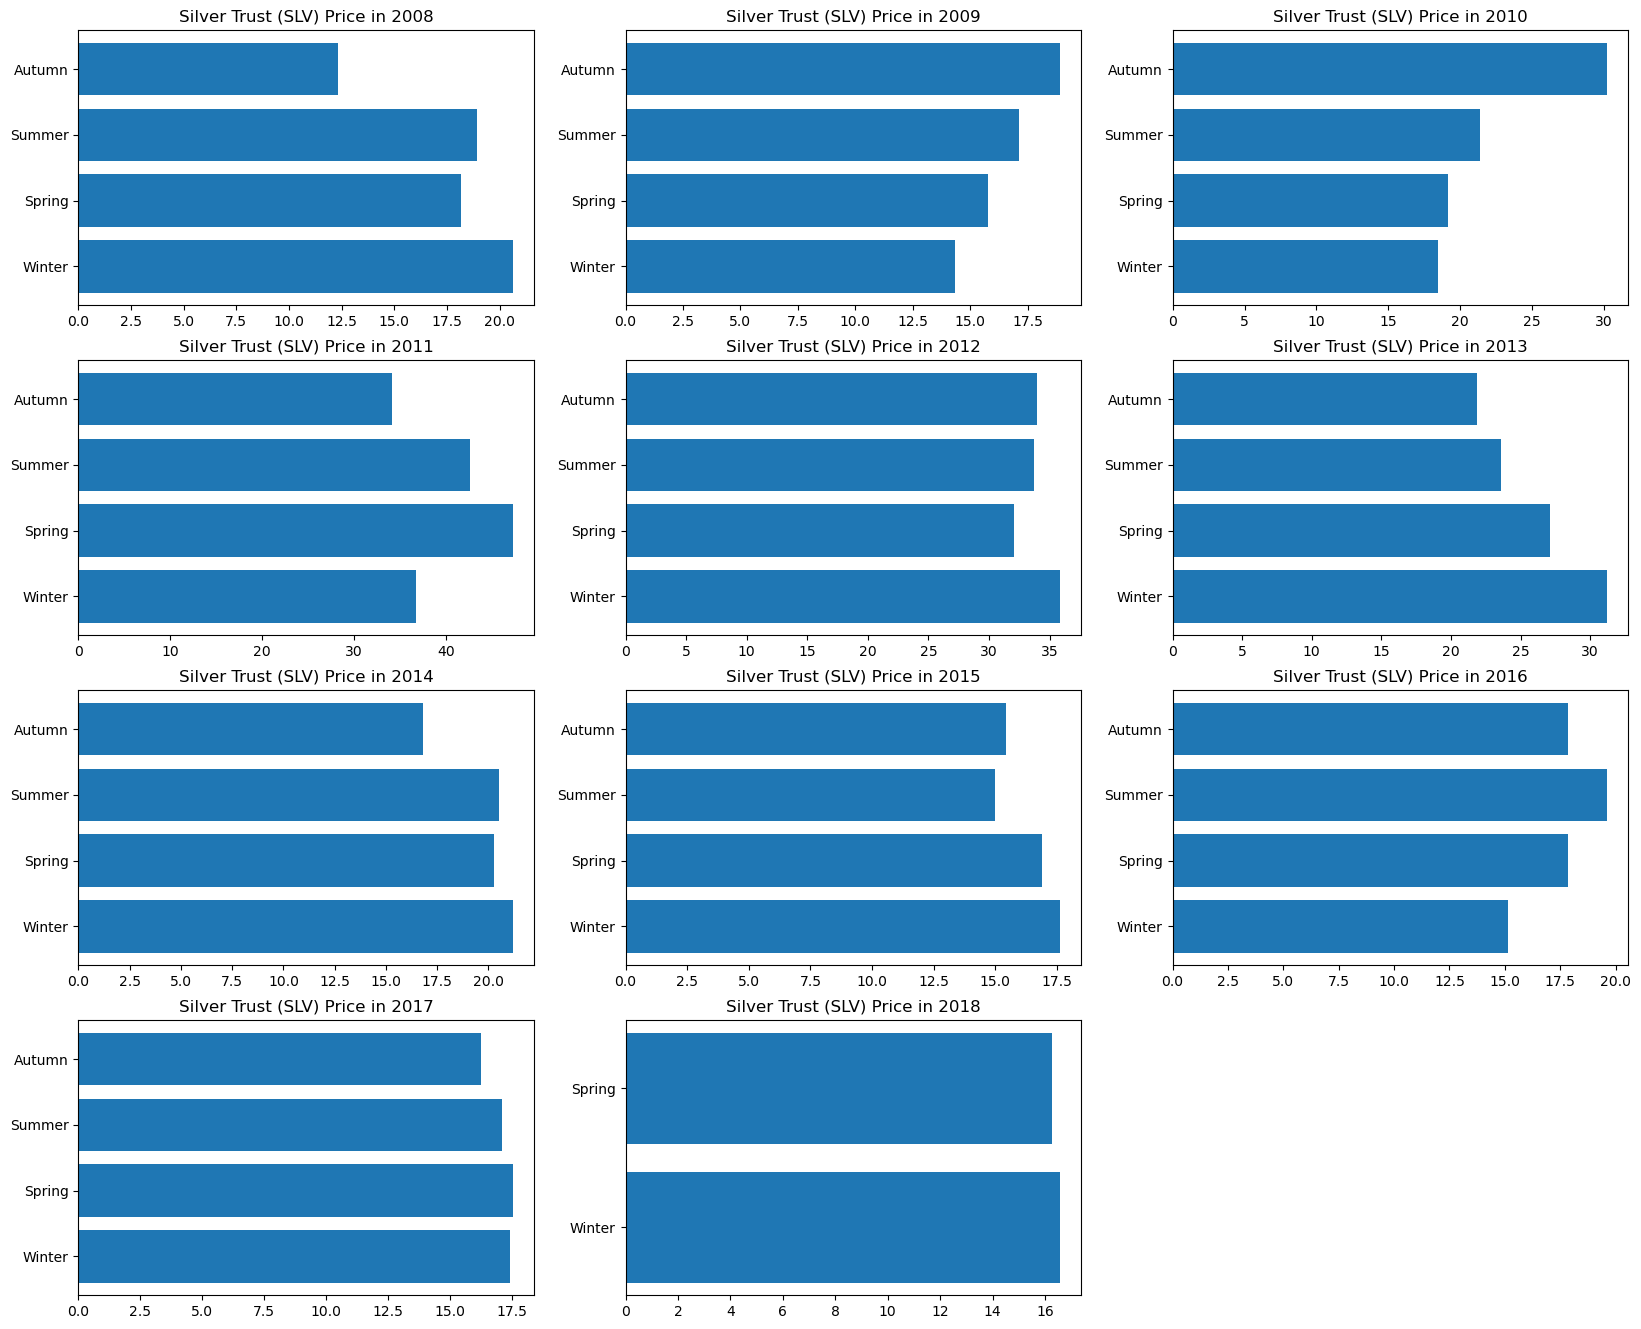

In [ ]:
bar_plot_seasen(name2[2],years,name[2])

According to the information presented in the graphs, it can be concluded that the price of silver has been on an upward trend during the period under review, but significant seasonal fluctuations are observed. In order to invest in the silver market, in addition to analyzing the price charts, other factors should also be considered and a comprehensive analysis should be used.

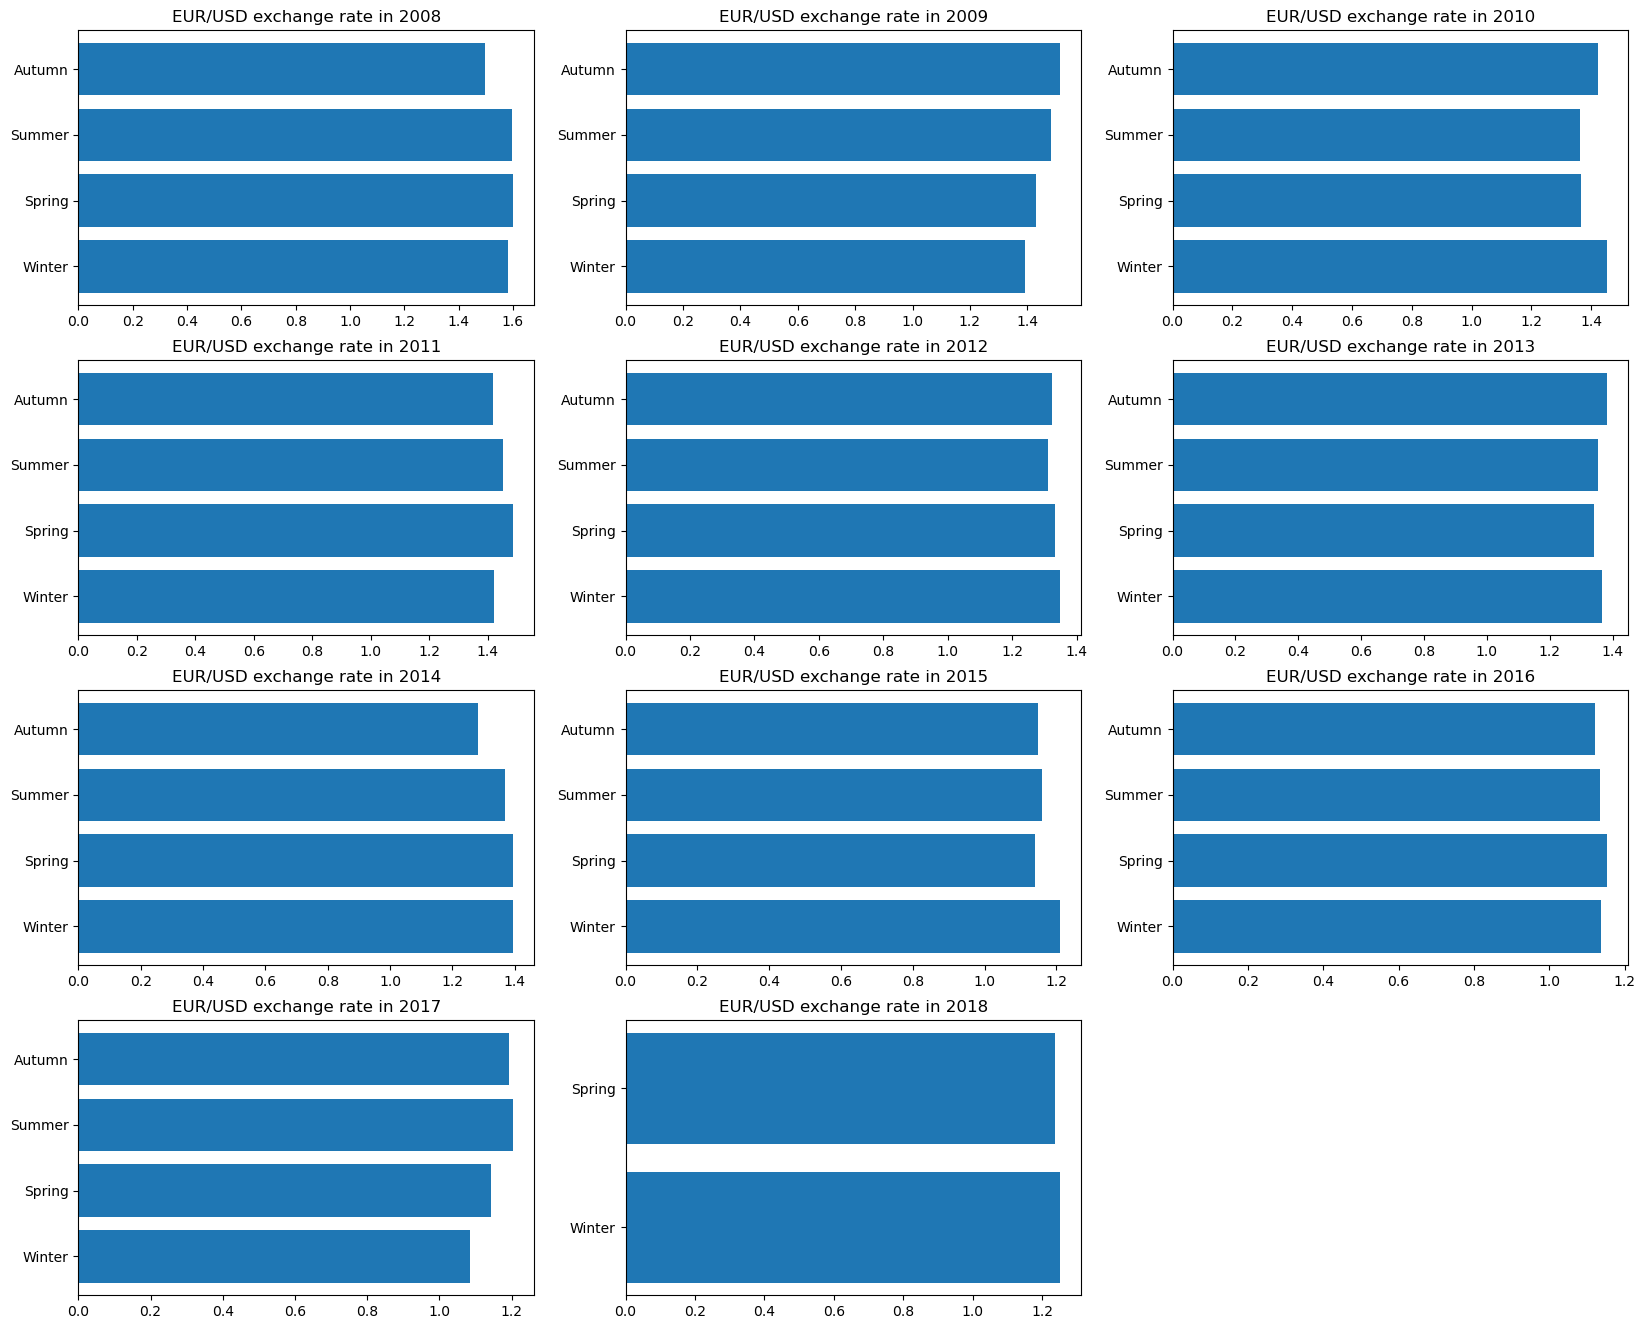

In [ ]:
bar_plot_seasen(name2[3],years,name[3])

Slight Seasonal Changes From the graphs, it seems that the exchange rate of Euro to Dollar has experienced very little seasonal fluctuations. In other words, significant changes are not observed between the average exchange rate in different seasons of a year or between different years.Relative stability In general, the exchange rate was relatively stable during the period under review and did not have strong fluctuations. Of course, this does not mean that the exchange rate is completely constant, and there have certainly been daily and weekly fluctuations.


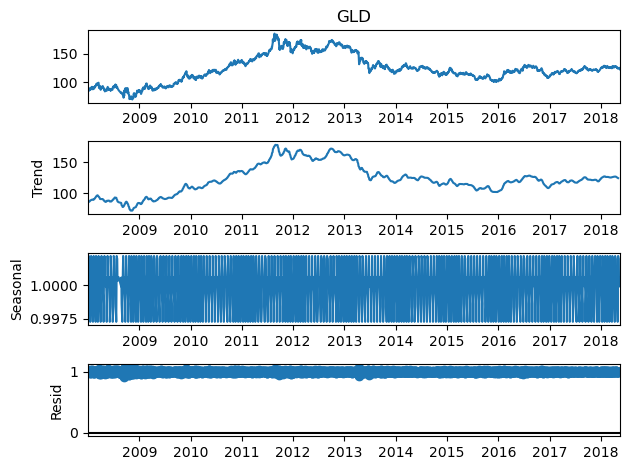

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

price = pd.read_csv('gld_price_data.csv', index_col='Date', parse_dates=True)


result = seasonal_decompose(price['GLD'], model='multiplicative', period=12)

result.plot()
plt.show()

The price of gold has fluctuated a lot during the period under review.
There seems to be a general upward trend in gold prices.
There are many short-term fluctuations in the price of gold, which can be influenced by various factors such as economic, political, etc. events.The trend chart shows that the price of gold has generally been on an upward trend.
This upward trend shows that investors have been looking at gold as a safe asset during this period.The seasonal chart shows significant fluctuations.It seems that in some seasons of the year, the price of gold has fluctuated more.These seasonal fluctuations can be related to various factors such as seasonal demand for gold in various industries, holidays and special events, and seasonal economic factors.
The rest of the chart shows random fluctuations.
These random fluctuations show that factors that are not included in the decomposition model have affected the price of gold.
Overall upward trend The results of the analysis show that the price of gold has generally been on an upward trend during the reviewed period. This could be due to various reasons such as increased investor concerns about inflation, economic and political instability, as well as increased demand for gold in various industries.
Seasonal fluctuationsThe presence of seasonal fluctuations in the price of gold shows that seasonal factors also affect the price of gold. These factors can include seasonal demand for gold in various industries, holidays and special events, and related seasonal economic factors.Random Fluctuations The presence of random fluctuations in the residual shows that factors that are not included in the decomposition model have affected the price of gold. These factors can include unexpected events such as financial crises, changes in monetary policies, and changes in the supply and demand of gold in global markets.

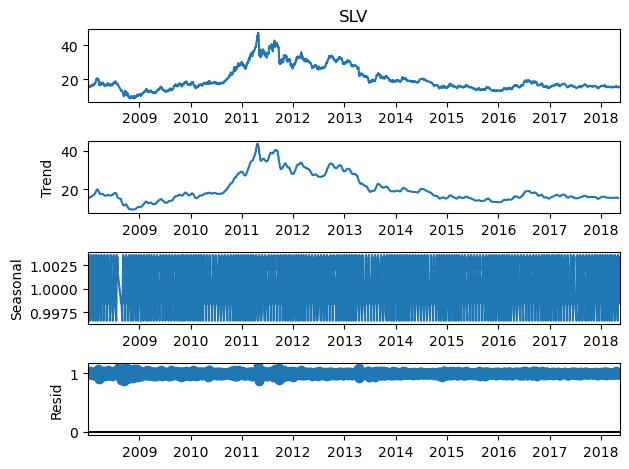

In [ ]:
result = seasonal_decompose(price['SLV'], model='multiplicative', period=12)

result.plot()
plt.show()

Overall upward trend The results of the analysis show that the price of silver has been generally upward during the period under review. This could be due to various reasons such as increased investor concerns about inflation, economic and political instability, as well as increased demand for silver in various industries.Seasonal fluctuations The presence of seasonal fluctuations in the price of silver shows that seasonal factors also affect the price of silver. These factors can include seasonal demand for silver in various industries, holidays and special events, and related seasonal economic factors.Random Fluctuations The existence of random fluctuations in the residual shows that factors that are not included in the decomposition model have affected the price of silver. These factors can include unexpected events such as financial crises, changes in monetary policies, and changes in the supply and demand of silver in global markets.


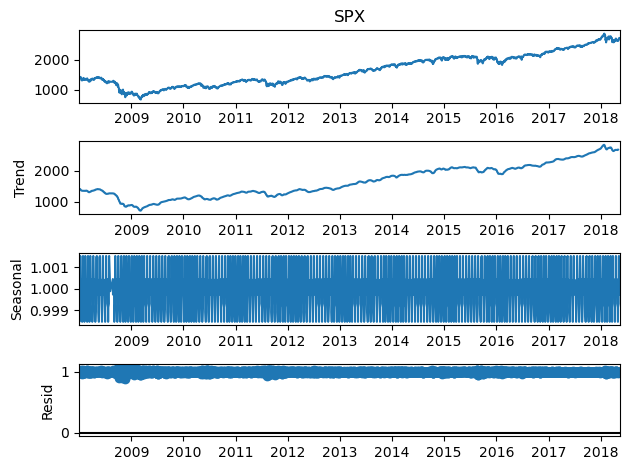

In [ ]:
result = seasonal_decompose(price['SPX'], model='multiplicative', period=12)

result.plot()
plt.show()

The top plot shows the actual S&P 500 Index values ​​over time, from around 2008 to 2018. The general trend is upwards, indicating a long-term increase in the index value with some fluctuations and The second plot represents the trend component of the time series. This smooth line captures the overall direction in which the SPX is moving over the years, filtering out short-term fluctuations. It shows a steady upward trend with some deceleration towards the end of the period and The third plot shows the seasonal component. This part captures the regular patterns or cycles that repeat at a consistent interval within the data. In the case of the SPX, the seasonal fluctuations are very minor, indicating that there is not a strong seasonal effect on the SPX index. The values ​​are tightly clustered around 1, indicating very small deviations and The bottom plot shows the residuals, which are the remaining part of the data after removing the trend and seasonal components. This represents the noise or irregular component. The residuals appear to be randomly distributed around 1, suggesting that the model has effectively captured the trend and seasonality, and what remains is random noise.


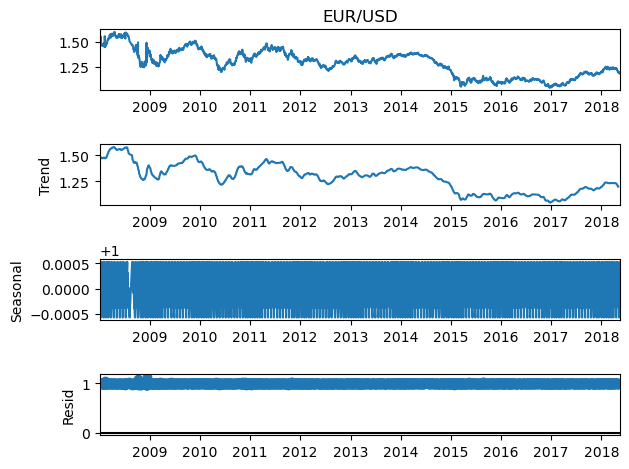

In [ ]:
result = seasonal_decompose(price['EUR/USD'], model='multiplicative', period=12)

result.plot()
plt.show()

The top plot shows the actual EUR/USD exchange rate values over time, from around 2008 to 2018. The general trend shows fluctuations with a gradual decline over the period and The second plot represents the trend component of the time series. This line captures the overall direction in which the EUR/USD exchange rate is moving over the years, smoothing out short-term fluctuations. It shows a downward trend, indicating a general depreciation of the Euro against the US Dollar over this period and The third plot shows the seasonal component. This part captures the regular patterns or cycles that repeat at consistent intervals within the data. In the case of the EUR/USD exchange rate, the seasonal component values are extremely small, almost negligible. This indicates that there isn't a strong seasonal effect on the EUR/USD exchange rate and The bottom plot shows the residuals, which are the remaining part of the data after removing the trend and seasonal components. This represents the noise or irregular component. The residuals appear to be randomly distributed, suggesting that the model has effectively captured the trend and seasonality, and what remains is mostly random noise.


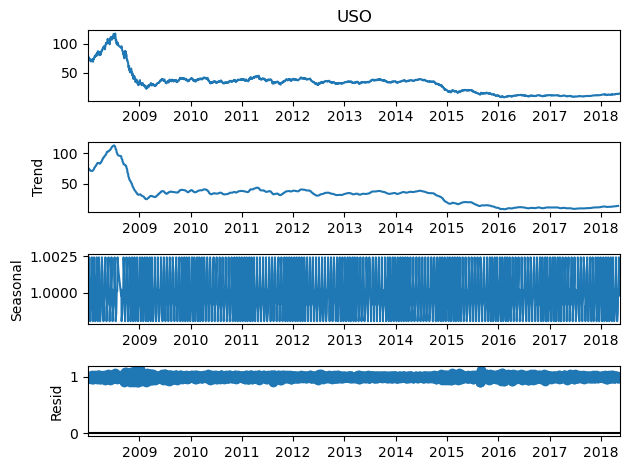

In [ ]:
result = seasonal_decompose(price['USO'], model='multiplicative', period=12)

result.plot()
plt.show()

The top plot shows the actual USO values over time, from around 2008 to 2018. The general trend shows a sharp decline initially and then a more gradual decrease with some fluctuations over the years and The second plot represents the trend component of the time series. This line captures the overall direction in which the USO is moving over the years, smoothing out short-term fluctuations. The trend shows a sharp drop initially, followed by a more gradual decline and then a leveling off towards the end of the period and The third plot shows the seasonal component. This part captures the regular patterns or cycles that repeat at consistent intervals within the data. In the case of the USO, the seasonal fluctuations are minor but present, indicating some periodic seasonal effect, though it is not very pronounced and The bottom plot shows the residuals, which are the remaining part of the data after removing the trend and seasonal components. This represents the noise or irregular component. The residuals appear to be randomly distributed, suggesting that the model has effectively captured the trend and seasonality, and what remains is mostly random noise.

# **Portfolio construction**

In [ ]:
gold_relation = df2[['SPX', 'GLD', 'USO', 'SLV', 'EUR_USD']].corr()

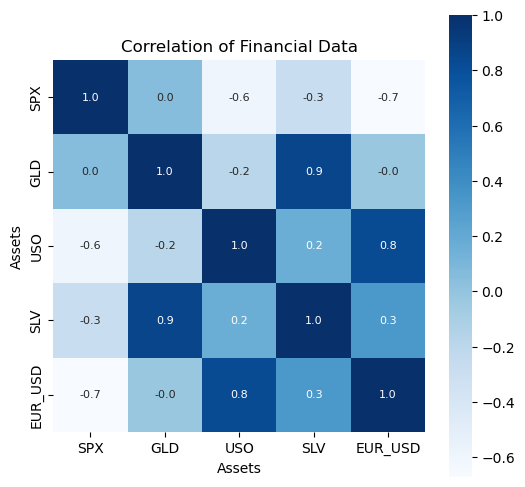

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(gold_relation, cbar=True, square=True, fmt='.1f', annot_kws={'size':8}, annot=True, cmap='Blues')
plt.title('Correlation of Financial Data')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.show()


**SPX (S&P 500 Index):**
**GLD (Gold):** Correlation is close to zero (0.0), indicating little to no linear relationship between the S&P 500 and Gold prices.

**USO (Oil):** Negative correlation (-0.6), suggesting that as the S&P 500 index increases, the USO tends to decrease and vice versa.

**SLV (Silver):** Weak negative correlation (-0.3), indicating a slight inverse relationship between the S&P 500 and Silver prices.

**EUR/USD:** Strong negative correlation (-0.7), suggesting that as the S&P 500 index rises, the EUR/USD exchange rate tends to fall and vice versa.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['SPX PCT'] = df.SPX.pct_change().dropna()
df['GLD PCT'] = df.GLD.pct_change().dropna()
df['USO PCT'] = df.USO.pct_change().dropna()
df['SLV PCT'] = df.SLV.pct_change().dropna()
df['EUR/USD PCT'] = df['EUR/USD'].pct_change().dropna()

In [ ]:
df3=df.set_index('Date')

In [ ]:
df3

,SPX,GLD,USO,SLV,EUR/USD,SPX PCT,GLD PCT,USO PCT,SLV PCT,EUR/USD PCT
Date,,,,,,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,NaN,NaN,NaN,NaN,NaN
2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,0.000000,0.008367,-0.001274,0.006917,0.001902
2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,-0.024552,-0.005142,-0.013526,-0.007720,0.000679
2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,0.003223,-0.004229,-0.023412,-0.007516,-0.004875
2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,-0.018352,0.023711,0.007417,0.035674,0.060478
...,...,...,...,...,...,...,...,...,...,...
2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,-0.000266,0.000161,-0.002837,-0.000644,-0.005518
2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,0.009682,-0.002087,0.022048,0.001289,-0.001742
2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,0.009371,0.006837,0.002784,0.013522,0.005935


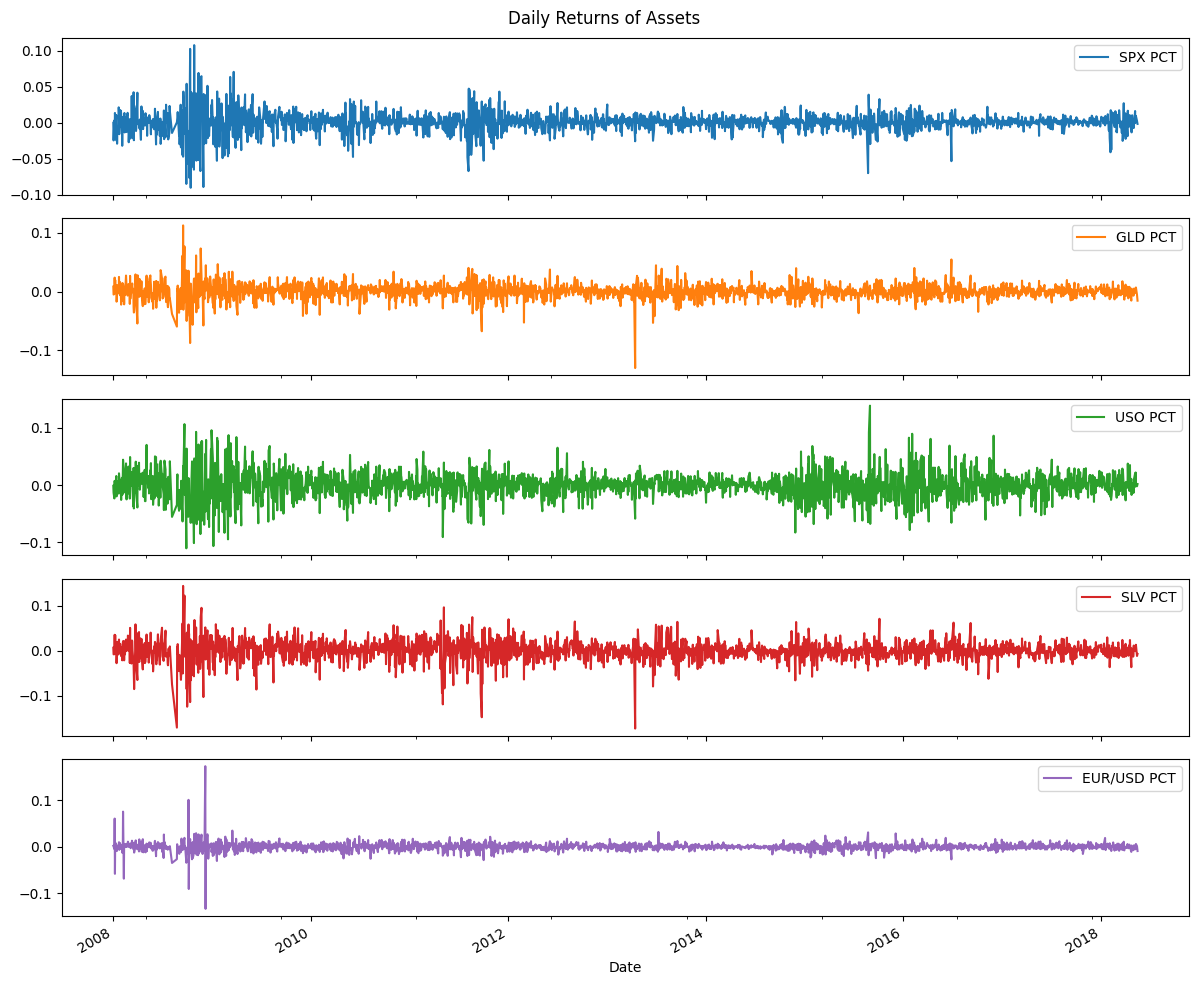

In [ ]:
cols = ['SPX PCT','GLD PCT','USO PCT','SLV PCT','EUR/USD PCT']

df3[cols].plot(subplots=True, figsize=(12,10), layout=(5,1), sharex=True, title="Daily Returns of Assets")
plt.tight_layout()
plt.show()

The 2008-2009 period shows significant volatility across all assets, likely due to the global financial crisis and Volatility varies by asset, with SLV and USO showing the most dramatic swings, while EUR/USD is the most stable.

In [ ]:
sharpe_spx = df3['SPX PCT'].mean() / df3['SPX PCT'].std()
sharpe_gold = df3['GLD PCT'].mean() / df3['GLD PCT'].std()
sharpe_uso = df3['USO PCT'].mean() / df3['USO PCT'].std()
sharpe_slv = df3['SLV PCT'].mean() / df3['SLV PCT'].std()
sharpe_eur_usd = df3['EUR/USD PCT'].mean() / df3['EUR/USD PCT'].std()

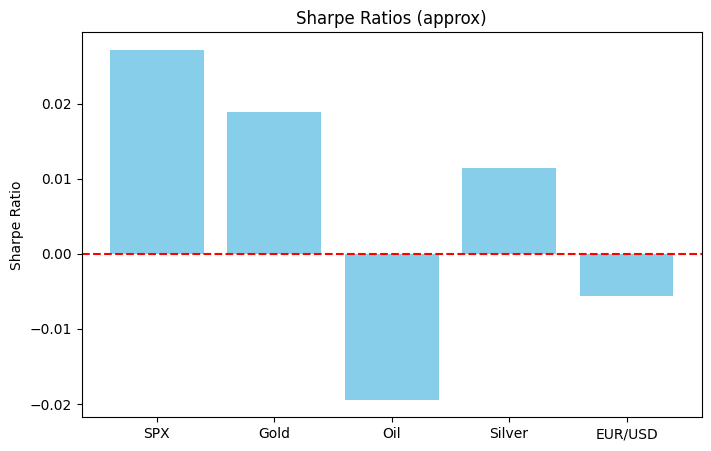

In [ ]:
assets = ['SPX', 'Gold', 'Oil', 'Silver', 'EUR/USD']
sharpe_vals = [sharpe_spx,sharpe_gold,sharpe_uso,sharpe_slv,sharpe_eur_usd]

plt.figure(figsize=(8,5))
plt.bar(assets, sharpe_vals, color='skyblue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Sharpe Ratios (approx)")
plt.ylabel("Sharpe Ratio")
plt.show()

In [ ]:
returns = df3[['SPX PCT','GLD PCT','SLV PCT']].dropna()
returns = returns.loc['2017-01-01':'2018-01-01']

In [ ]:
monthly_cumulative_returns = (1 + returns).resample("M").prod().cumprod() - 1
monthly_cumulative_returns

/tmp/ipython-input-2540442350.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_cumulative_returns = (1 + returns).resample("M").prod().cumprod() - 1


,SPX PCT,GLD PCT,SLV PCT
Date,,,
2017-01-31,0.017884,0.054192,0.100596
2017-02-28,0.055748,0.087766,0.149570
2017-03-31,0.057722,0.080832,0.135010
2017-04-30,0.066972,0.098349,0.083389
2017-05-31,0.077259,0.100447,0.084712
2017-06-30,0.080788,0.079464,0.041032
2017-07-31,0.103389,0.101633,0.052283
2017-08-31,0.103992,0.147888,0.101919
2017-09-30,0.121148,0.114953,0.053607


In [ ]:
cumulative_return_spx = (1 + monthly_cumulative_returns['SPX PCT']).prod() - 1
cumulative_return_gold = (1 + monthly_cumulative_returns['GLD PCT']).prod() - 1
cumulative_return_slv = (1 + monthly_cumulative_returns['SLV PCT']).prod() - 1

print("Cumulative Return SPX Stock:", cumulative_return_spx)
print("Cumulative Return Gold Stock:", cumulative_return_gold)
print("Cumulative Return SLV Stock:", cumulative_return_slv)

Cumulative Return SPX Stock: 2.132609033373697
Cumulative Return Gold Stock: 2.1283170693766222
Cumulative Return SLV Stock: 1.436328197344292


In stocks, the **SPX** monthly return over the entire period has been around **+213%** cumulative return, **GLD** has been around **+212%** cumulative return, and **SLV** has been around **+143%** cumulative return.

In [ ]:
mean_returns = returns.mean()
cov_matrix = returns.cov()
assets = returns.columns
num_assets = len(mean_returns)

In [ ]:
num_portfolios = 50000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = sharpe_ratio

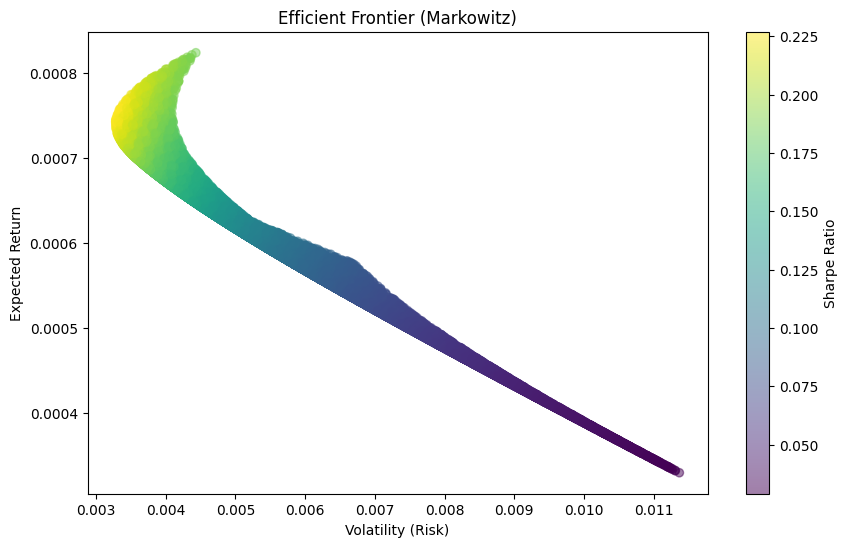

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (Markowitz)')
plt.show()

In [ ]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, risk

def negative_sharpe(weights, mean_returns, cov_matrix, risk_free=0):
    p_ret, p_vol = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free) / p_vol

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))


def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

In [ ]:
min_vol = minimize(portfolio_volatility, num_assets*[1./num_assets],
                   args=(mean_returns, cov_matrix), method='SLSQP',
                   bounds=bounds, constraints=constraints)

max_sharpe = minimize(negative_sharpe, num_assets*[1./num_assets],
                      args=(mean_returns, cov_matrix), method='SLSQP',
                      bounds=bounds, constraints=constraints)

min_vol_weights = min_vol.x
max_sharpe_weights = max_sharpe.x

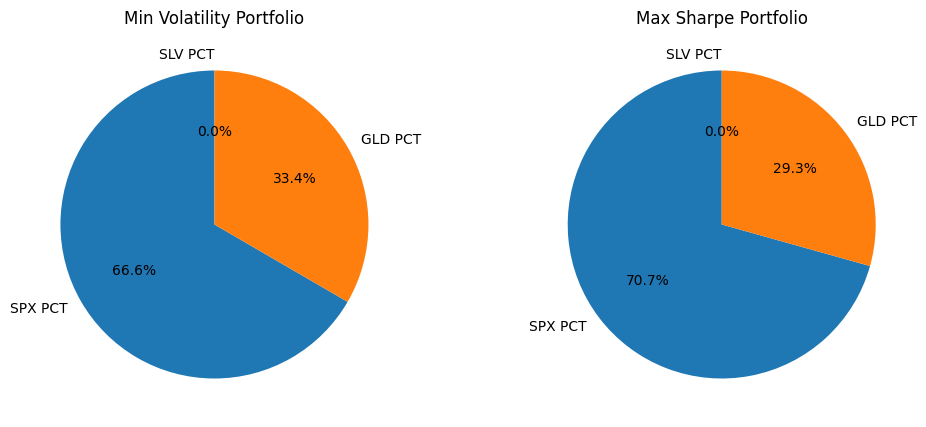

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].pie(min_vol_weights, labels=assets, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Min Volatility Portfolio")

axs[1].pie(max_sharpe_weights, labels=assets, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Max Sharpe Portfolio")

plt.show()

Both portfolios rely on SPX as the main basis, indicating the key role of this index in investment strategies. The complete elimination of SLV in both portfolios indicates that the high volatility of silver is not suitable for these strategies. The portfolio with the minimum volatility gives more weight to GLD to provide more stability, while the portfolio with the maximum Sharpe seeks higher returns with controlled risk by increasing the SPX share. The difference in GLD weighting (33.4% vs. 29.3%) indicates a delicate balance between reducing volatility and optimizing returns.

In [ ]:
min_vol_ret, min_vol_risk = portfolio_performance(min_vol_weights, mean_returns, cov_matrix)
max_sharpe_ret, max_sharpe_risk = portfolio_performance(max_sharpe_weights, mean_returns, cov_matrix)

print("Min Volatility Portfolio:")
print(f"Expected Return: {min_vol_ret:.5f}, Volatility: {min_vol_risk:.5f}\n")

print("Max Sharpe Portfolio:")
print(f"Expected Return: {max_sharpe_ret:.5f}, Volatility: {max_sharpe_risk:.5f}")


Min Volatility Portfolio:
Expected Return: 0.00074, Volatility: 0.00328

Max Sharpe Portfolio:
Expected Return: 0.00075, Volatility: 0.00330


In [ ]:
results = pd.DataFrame({
    "Portfolio": ["Min Volatility", "Max Sharpe"],
    "SPX Weight": [min_vol_weights[0], max_sharpe_weights[0]],
    "GLD Weight": [min_vol_weights[1], max_sharpe_weights[1]],
    "SLV Weight": [min_vol_weights[2], max_sharpe_weights[2]],
    "Expected Return": [min_vol_ret, max_sharpe_ret],
    "Volatility": [min_vol_risk, max_sharpe_risk],
    "Sharpe Ratio": [
        min_vol_ret/min_vol_risk,
        max_sharpe_ret/max_sharpe_risk
    ]
})

results.iloc[:, 1:4] = results.iloc[:, 1:4].applymap(lambda x: f"{x:.2%}")
results["Expected Return"] = results["Expected Return"].round(4)
results["Volatility"] = results["Volatility"].round(4)
results["Sharpe Ratio"] = results["Sharpe Ratio"].round(2)
results

/tmp/ipython-input-3108115446.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.iloc[:, 1:4] = results.iloc[:, 1:4].applymap(lambda x: f"{x:.2%}")
/tmp/ipython-input-3108115446.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    66.62%
1    70.65%
Name: SPX Weight, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.iloc[:, 1:4] = results.iloc[:, 1:4].applymap(lambda x: f"{x:.2%}")
/tmp/ipython-input-3108115446.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    33.38%
1    29.35%
Name: GLD Weight, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results.iloc[:, 1:4] = results.iloc[:, 1:4].applymap(lambda x: f"{x:.2%}")
/tmp/ipython-input-3108115446.py:14: FutureWarni

,Portfolio,SPX Weight,GLD Weight,SLV Weight,Expected Return,Volatility,Sharpe Ratio
0,Min Volatility,66.62%,33.38%,0.00%,0.0007,0.0033,0.23
1,Max Sharpe,70.65%,29.35%,0.00%,0.0008,0.0033,0.23


In [ ]:
weights = {'SPX': 0.66, 'GLD': 0.41, 'SLV': 0.0}

portfolio_monthly_returns = (
    monthly_cumulative_returns[['SPX PCT', 'GLD PCT', 'SLV PCT']]
    .mul(list(weights.values()), axis=1)
    .sum(axis=1)
)

cumulative_portfolio_return = (1 + portfolio_monthly_returns).prod() - 1

print("Cumulative Portfolio Return:", cumulative_portfolio_return)


Cumulative Portfolio Return: 2.3829481905998042


In [ ]:
weight_stocks = np.array(list(weights.values()))
portfolio_returns = returns.dot(weight_stocks)
cumulative_returns = (1 + portfolio_returns).cumprod()
cummax = cumulative_returns.cummax()
drawdown = (cumulative_returns - cummax) / cummax

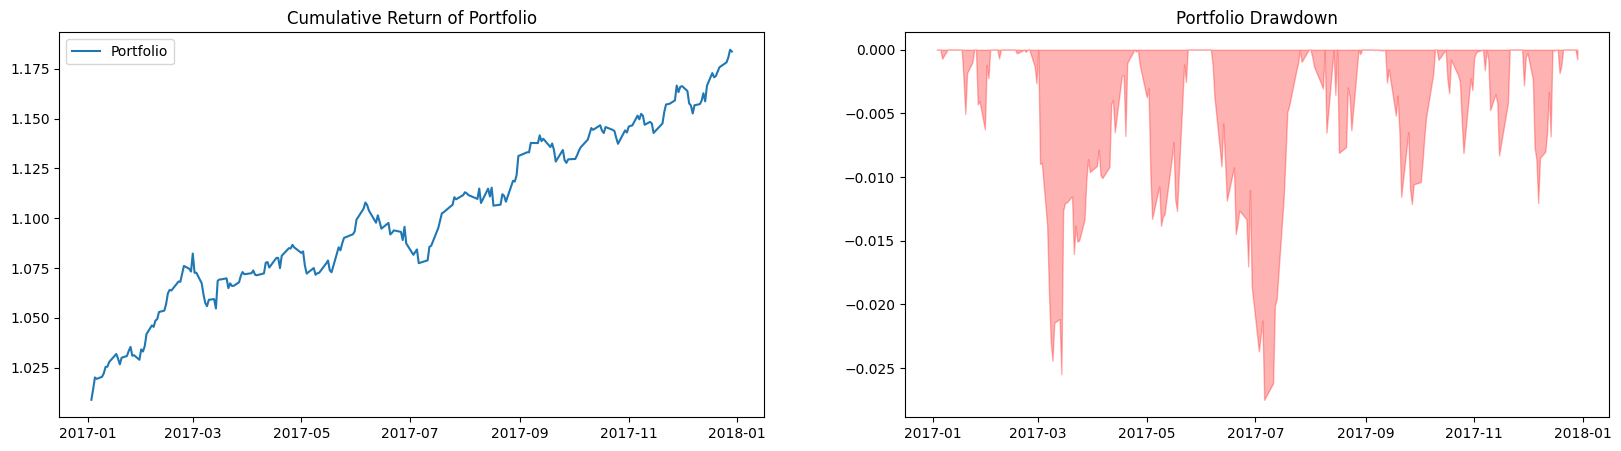

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(cumulative_returns, label="Portfolio")
axs[0].set_title("Cumulative Return of Portfolio")
axs[0].legend()

axs[1].fill_between(drawdown.index, drawdown, 0, color="red", alpha=0.3)
axs[1].set_title("Portfolio Drawdown")

plt.show()

The cumulative return of 17.5% suggests that the portfolio has performed well over this period, likely a result of the continued growth of the SPX and the relative protection of GLD from market risks, and their limited declines and rapid recoveries indicate a good balance between the two assets. Gold, as a safe haven asset, has moderated the volatility of the SPX, and the combination of these two assets has allowed the portfolio to both grow and be protected from sharp declines, and the small fluctuations in returns and declines indicate that the portfolio is not completely immune to risk and may need to be readjusted in times of crisis.

In [ ]:
sharpe = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)
sortino = portfolio_returns.mean() / portfolio_returns[portfolio_returns<0].std() * np.sqrt(252)
calmar = (cumulative_returns.iloc[-1]**(252/len(portfolio_returns)) - 1) / abs(drawdown.min())

print("Sharpe Ratio:", round(sharpe,2))
print("Sortino Ratio:", round(sortino,2))
print("Calmar Ratio:", round(calmar,2))
print("Max Drawdown:", round(drawdown.min()*100,2), "%")

Sharpe Ratio: 3.5
Sortino Ratio: 6.02
Calmar Ratio: 7.83
Max Drawdown: -2.75 %


The Sharpe, Sortino, and Kalmer ratios are very high, indicating an excellent balance between return and risk (especially downside risk). This portfolio outperforms many traditional portfolios, with a very limited maximum drawdown of 2.75%, indicating that the SPX and GLD combination has handled volatility well and avoided sharp declines, and the presence of gold (GLD) as a safe haven asset, combined with the steady growth of the SPX, likely contributed to this strong performance.

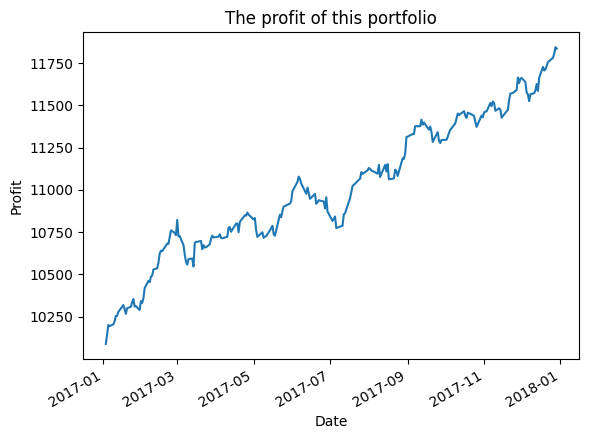

In [ ]:
portfolio_returns = (returns @ weight_stocks)
cumulative_growth = (1 + portfolio_returns).cumprod()
initial_investment = 10000
portfolio_value = initial_investment * cumulative_growth
portfolio_value.plot()
plt.title('The profit of this portfolio')
plt.ylabel('Profit')
plt.show()

A 15% growth in one year indicates good portfolio performance, which, given the previous combination (SPX and GLD), is the result of a balance between the growth of the SPX and the stability of the GLD.

# **Loss check**

Historical VaR & CVaR

In [ ]:
def historical_var_cvar(returnss, alpha=0.95):
    var = np.percentile(returnss, (1-alpha)*100)
    cvar = returnss[returnss <= var].mean()
    return var, cvar

Parametric (Normal) VaR & CVaR

In [ ]:
def parametric_var_cvar(returns, alpha=0.95):
    mu, sigma = returns.mean(), returns.std()
    z = st.norm.ppf(1-alpha)
    var = mu + z * sigma
    cvar = mu - (st.norm.pdf(z)/alpha) * sigma
    return var, cvar

In [ ]:
alphas = [0.90, 0.95, 0.99]
portfolio_value = 100_000
results = []

for a in alphas:
    hist_var, hist_cvar = historical_var_cvar(portfolio_returns, a)
    param_var, param_cvar = parametric_var_cvar(portfolio_returns, a)

    results.append({
        "Alpha": a,
        "Hist_VaR_%": hist_var,
        "Hist_CVaR_%": hist_cvar,
        "Param_VaR_%": param_var,
        "Param_CVaR_%": param_cvar,
        "Hist_VaR_$": hist_var*portfolio_value,
        "Hist_CVaR_$": hist_cvar*portfolio_value,
        "Param_VaR_$": param_var*portfolio_value,
        "Param_CVaR_$": param_cvar*portfolio_value,
    })

result_df = pd.DataFrame(results)
result_df.round(4)

,Alpha,Hist_VaR_%,Hist_CVaR_%,Param_VaR_%,Param_CVaR_%,Hist_VaR_$,Hist_CVaR_$,Param_VaR_$,Param_CVaR_$
0,0.90,-0.0038,-0.0055,-0.0037,0.0001,-382.3347,-546.2124,-374.8469,9.0923
1,0.95,-0.0051,-0.0064,-0.0050,0.0004,-513.6935,-643.5603,-503.2215,39.6343
2,0.99,-0.0075,-0.0082,-0.0074,0.0007,-748.6574,-824.7565,-744.0310,68.4831


In [122]:
for i in range(len(alphas)):
  var_historical = np.percentile(returns, (1 - alphas[i]) * 100)
  print(f"Historical Daily VaR ({alphas[i]}%):", var_historical)

Historical Daily VaR (0.9%): -0.008148553253121561
Historical Daily VaR (0.95%): -0.012188255198563383
Historical Daily VaR (0.99%): -0.022222219588908687


In [ ]:
for i in range(len(alphas)):
  var_historical = np.percentile(portfolio_monthly_returns, (1 - alphas[i]) * 100)
  print(f"Historical Monthly VaR ({alphas[i]}%):", var_historical)

Historical Monthly VaR (0.9%): 0.07139170090968572
Historical Monthly VaR (0.95%): 0.054490855241664
Historical Monthly VaR (0.99%): 0.038116138512879566


In [ ]:
Var = []
CVar = []
for i in range(len(alphas)):
  sorted_returns = np.sort(portfolio_returns)
  var_level = int((1 - alphas[i]) * len(sorted_returns))
  VaR_95 = sorted_returns[var_level]
  CVaR_95 = sorted_returns[:var_level].mean()
  Var.append(VaR_95)
  CVar.append(CVaR_95)
  print(f"Historical VaR ({alphas[i]}%): {VaR_95}")
  print(f"Historical CVaR ({alphas[i]}%): {CVaR_95}")
  print()

Historical VaR (0.9%): -0.003949523456307028
Historical CVaR (0.9%): -0.00553415268150992

Historical VaR (0.95%): -0.005187941565450198
Historical CVaR (0.95%): -0.006560369256588159

Historical VaR (0.99%): -0.007676022143377738
Historical CVaR (0.99%): -0.008533336671780061



Convert daily to monthly

In [118]:
res_2 = []
for i in range(0,3):
  daily_var_95 = abs(Var[i])
  monthly_var_95 = daily_var_95 * np.sqrt(21)
  res_2.append({
        "Alpha": alphas[i],
        "Daily Var": daily_var_95 ,
        "Monthly Var":  monthly_var_95
    })
results_df = pd.DataFrame(res_2)
results_df

,Alpha,Daily Var,Monthly Var
0,0.90,0.003950,0.018099
1,0.95,0.005188,0.023774
2,0.99,0.007676,0.035176


With a **95%** probability, we expect the monthly portfolio loss to be no more than about **2.38%**.

Dollar VaR and Clean Reporting

In [115]:
portfolio_value = 100_000
res_1=[]
for i in range(0,3):
  var95_pct = abs(Var[i])
  cvar95_pct = abs(CVar[i])

  var95_usd = var95_pct * portfolio_value
  cvar95_usd = cvar95_pct * portfolio_value
  res_1.append({
        "Alpha": alphas[i],
        "Loss_Var": var95_usd ,
        "Loss_CVar": cvar95_usd
    })

results_df = pd.DataFrame(res_1)
results_df

,Alpha,Loss_Var,Loss_CVar
0,0.90,394.952346,553.415268
1,0.95,518.794157,656.036926
2,0.99,767.602214,853.333667


VaR 95% (USD): 51,879 means that if you consider the total value of your portfolio to be $100,000, you would expect with 95% confidence that your daily loss would not exceed about $51,879.
Simply put: only on the 5% worst days could your loss be greater than this, and CVaR 95% (USD): 65,604 means that when you actually get into those 5% worst days, the average daily loss would be about $65,604.

Rolling VaR + Counting Failures (Backtesting)

In [ ]:
window = 252
result = []
for i in range(0,3):
  roll_var = portfolio_returns.rolling(window).quantile(1 - alphas[i])
  breaches = (portfolio_returns < roll_var).astype(int)
  breach_rate = breaches.sum() / breaches.count()
  result.append({
        "Alpha": alphas[i],
        "Breach rate_%": breach_rate,
    })
results_df = pd.DataFrame(result)
results_df

,Alpha,Breach rate_%
0,0.90,0.0
1,0.95,0.0
2,0.99,0.0


Theoretically, for a VaR at the 95% level, we would expect VaR to be breached about 5% of the days (i.e. approximately 1 day in every 20 trading days), and if the Breach Rate is much less than 5% (e.g. 0.0), the model is likely overly conservative and overestimating the risk.

Direct monthly VaR (preferred)

In [ ]:
que = [1 - a for a in alphas]

monthly_rets = (1 + portfolio_returns).resample('M').prod() - 1

results = []
for i in range(len(alphas)):
    var_m = monthly_rets.quantile(que[i])
    cvar_m = monthly_rets[monthly_rets <= var_m].mean()
    results.append({
        "Alpha": alphas[i],
        "VaR_monthly_%": var_m,
        "CVaR_monthly_%": cvar_m
    })


results_df = pd.DataFrame(results)
results_df


/tmp/ipython-input-3774591301.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rets = (1 + portfolio_returns).resample('M').prod() - 1


,Alpha,VaR_monthly_%,CVaR_monthly_%
0,0.90,-0.001457,-0.003538
1,0.95,-0.003333,-0.005595
2,0.99,-0.005143,-0.005595


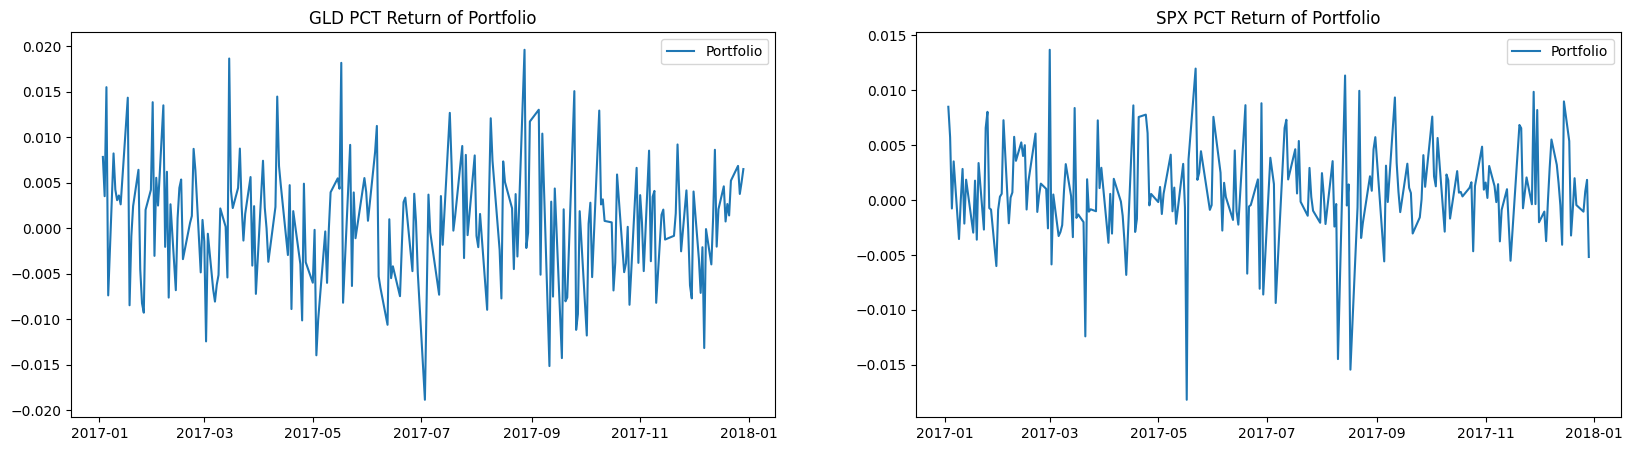

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

axs[0].plot(returns['GLD PCT'], label="Portfolio")
axs[0].set_title("GLD PCT Return of Portfolio")
axs[0].legend()

axs[1].plot(returns['SPX PCT'], label="Portfolio")
axs[1].set_title("SPX PCT Return of Portfolio")
axs[1].legend()

plt.show()

In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.3/978.3 kB 39.4 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
def garch_volatility(returns, ticker):
    model = arch_model(returns[ticker] * 100, vol='Garch', p=1, q=1)
    garch_fit = model.fit(disp='off')
    print(f"Predicted volatility of {ticker} (GARCH): {garch_fit.conditional_volatility[-1]:.2f}%")
    return garch_fit

In [ ]:
garch_spy = garch_volatility(returns, 'SPX PCT')
garch_gld = garch_volatility(returns, 'GLD PCT')

Predicted volatility of SPX PCT (GARCH): 0.42%
Predicted volatility of GLD PCT (GARCH): 0.65%


/tmp/ipython-input-1661185458.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted volatility of {ticker} (GARCH): {garch_fit.conditional_volatility[-1]:.2f}%")
/tmp/ipython-input-1661185458.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Predicted volatility of {ticker} (GARCH): {garch_fit.conditional_volatility[-1]:.2f}%")


Cornish–Fisher semi-parametric VaR

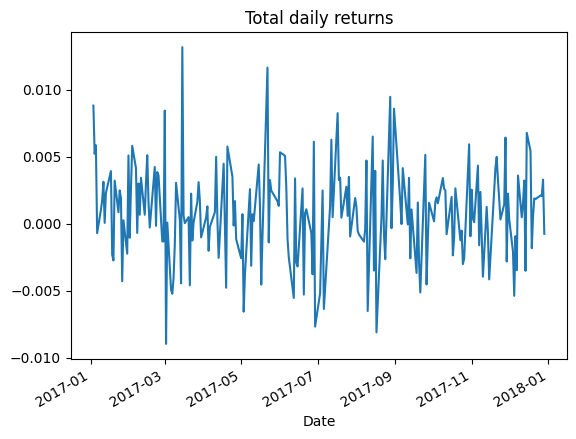

In [ ]:
portfolio_returns = (returns * weight_stocks).sum(axis=1)
portfolio_returns.plot()
plt.title('Total daily returns')
plt.show()

In [ ]:
def Cornish_Fisher(alp):
  trading_days_month = 21
  skew = st.skew(portfolio_returns)
  excess_kurtosis = st.kurtosis(portfolio_returns)

  z_normal = st.norm.ppf(1 - alphas[alp])
  z_cf = (z_normal +
        (1/6)*(z_normal**2 - 1)*skew +
        (1/24)*(z_normal**3 - 3*z_normal)*excess_kurtosis -
        (1/36)*(2*z_normal**3 - 5*z_normal)*skew**2)


  mean_ret = np.mean(portfolio_returns)
  std_ret = np.std(portfolio_returns)

  VaR_daily_pct = mean_ret + z_cf * std_ret
  VaR_daily_loss_pct = -VaR_daily_pct

  VaR_monthly_pct = VaR_daily_pct * np.sqrt(trading_days_month)
  VaR_monthly_loss_pct = -VaR_monthly_pct

  VaR_daily_USD = VaR_daily_loss_pct * portfolio_value
  VaR_monthly_USD = VaR_monthly_loss_pct * portfolio_value

  result = pd.DataFrame([{
    "alpha": alphas[alp],
    "skew": skew,
    "excess_kurtosis": excess_kurtosis,
    "z_normal": z_normal,
    "z_cf": z_cf,
    "VaR_daily_pct": VaR_daily_pct,
    "VaR_daily_loss_pct": VaR_daily_loss_pct,
    "VaR_monthly_pct": VaR_monthly_pct,
    "VaR_monthly_loss_pct": VaR_monthly_loss_pct,
    "VaR_daily_USD": VaR_daily_USD,
    "VaR_monthly_USD": VaR_monthly_USD
  }])
  return result

In [ ]:
res1 = pd.DataFrame({})
for i in range(len(alphas)):
    res = Cornish_Fisher(i)
    res1 = pd.concat([res1, res], ignore_index=True)

res1

,alpha,skew,excess_kurtosis,z_normal,z_cf,VaR_daily_pct,VaR_daily_loss_pct,VaR_monthly_pct,VaR_monthly_loss_pct,VaR_daily_USD,VaR_monthly_USD
0,0.90,0.132974,0.600502,-1.281552,-1.224862,-0.003538,0.003538,-0.016214,0.016214,353.821416,1621.413422
1,0.95,0.132974,0.600502,-1.644854,-1.594604,-0.004842,0.004842,-0.022188,0.022188,484.171807,2218.753955
2,0.99,0.132974,0.600502,-2.326348,-2.362306,-0.007548,0.007548,-0.034590,0.034590,754.820165,3459.020541


<a class="anchor" id="EDA"></a>
<br>
<br>
<br>
<font style="font-family:Gabriola; font-size:300%;">5️⃣ Step 5 | Modeling </font><br>
 <br>   
<br>

In [ ]:
from prophet import Prophet

def prophet_forecast(returns, ticker, horizon=12):
    df = pd.DataFrame({'ds': returns.index, 'y': returns[ticker]})
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(df)
    future = model.make_future_dataframe(periods=horizon, freq='M')
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']][-horizon:]

In [ ]:
spx_forecast = prophet_forecast(returns, 'SPX PCT')
gld_forecast = prophet_forecast(returns, 'GLD PCT')

DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zxzopcq/trgvtcwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zxzopcq/pc_j1nxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11830', 'data', 'file=/tmp/tmp4zxzopcq/trgvtcwi.json', 'init=/tmp/tmp4zxzopcq/pc_j1nxb.json', 'output', 'file=/tmp/tmp4zxzopcq/prophet_modelb5w7so5m/prophet_model-20250821215514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:55:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:55:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4zxzopcq/e

In [ ]:
portfolio_forecast = (spx_forecast['yhat'] * weight_stocks[0] + gld_forecast['yhat'] * weight_stocks[1])
print(f"Forecast of portfolio return (next 12 months): {portfolio_forecast.mean()*100:.2f}%")

Forecast of portfolio return (next 12 months): -0.85%
